# Importar as bibliotecas necessárias

In [1]:
#import matplotlib as mpl
# import seaborn as sns
import datetime
# import sklearn
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import KernelPCA
import numpy as np
import pandas as pd
# import math
# import keras
import matplotlib.pyplot as plt
import tensorflow as tf
# import seaborn as sns
import json
# Time library to know how much time things take
import time
import random

2025-04-14 20:40:59.438671: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Configurar execução

In [2]:
run_start = time.time()
# run date isoformat
run_date = datetime.datetime.now()
print(run_date.isoformat())
print(run_date.strftime("%Y-%m-%d %H:%M:%S.%f"))

2025-04-14T20:41:02.991609
2025-04-14 20:41:02.991609


In [3]:
NUMBER_OF_SUB_EXPERIMENT = 8
MODEL_TO_USE = 1

# COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
COLUMN_TO_PREDICT = 'IBOVESPA - Close'

# Dataframe constants
# Train, val and test split
START_ON_FIRST_VALID_DATE = True
START_DATE = None # '1995-01-02' # None
END_DATE = None # '2016-04-22' # None
TYPE_OF_UNIT = 'customDays'
# csv have 7993 data rows
TRAINING_SIZE = '1994-01-03'
VALIDATION_SIZE = '2023-10-01'
TESTING_SIZE = '2024-10-01'
FILE = 'data/2 - processed/normalized_data.csv'

# Keras config constants
BATCH_SIZE = 32
MAX_EPOCHS = 500
LEARNING_RATE = 0.01
LEARNING_DECAY = 0.9
DECAY_STEPS = 1000
PATIENCE = 10
# DECAY_EVERY_EPOCHS = 2
NUM_FEATURES = 10 # None # 100
RANDOM_SEED = 453
INPUT_WINDOW_SIZE = 4
OUTPUT_WINDOW_SIZE = 1
# Model constantsNUM_FEATURE
LOSS_FUNCTION = 'MAE'
MISMATCH_PENALITY = 2

# Save data constants
RUN_MOMENT = "2025-04-14 20:40:57"
SAVE_FILE_PATH = 'results/experiment_1'

# Comment to help Orquestrator to find the variables

In [4]:
# # define columns to use and columns to predict
# if NUMBER_OF_SUB_EXPERIMENT == 1:
#     COLUMNS_TO_USE = ['IBOVESPA - Close']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 2:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 3:'DXY - Close', 'Gold - Close', 'Brent Crude Oil - Close'
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 5:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 6:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 7:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 8:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 9:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'

In [5]:
MODEL_NAME = ''
if MODEL_TO_USE == 1:
    MODEL_NAME = 'Model_1'
elif MODEL_TO_USE == 2:
    MODEL_NAME = 'Model_2'
elif MODEL_TO_USE == 3:
    MODEL_NAME = 'Model_3'
else:
    # throw error
    raise ValueError("MODEL_TO_USE must be 1, 2 or 3")

In [6]:
# Config fix seed
tf.random.set_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [7]:
save_file_name = f"{RUN_MOMENT}-s{NUMBER_OF_SUB_EXPERIMENT}-m{MODEL_TO_USE}"

In [8]:
# load normalized data from /data/2 - processed/normalized_data.csv
imported_df = pd.read_csv(FILE, index_col=0)

In [9]:
df_x_values = imported_df.copy()
# order on index
df_x_values = df_x_values.sort_index(ascending=True)
# turn index into column
df_x_values.reset_index(inplace=True)
# remove the first column (index)
df_x_values.drop(columns=['index'], inplace=True)
df_x_values.head()

,IBOVESPA - Close,IBOVESPA - High,IBOVESPA - Low,IBOVESPA - Open,Dólar - Close,Dólar - High,Dólar - Low,Dólar - Open,Dow Jones - Close,Dow Jones - High,...,IBOVESPA - Spread %,Kospi - Spread %,Minério de Ferro - Spread %,Nasdaq - Spread %,Nikkei - Spread %,Petróleo Brent - Spread %,Petróleo WTI - Spread %,S&P 500 - Spread %,STOXX 600 - Spread %,Shanghai SE - Spread %
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.003941,0.003148,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.000150,0.000150,0.000049,0.000034,0.0,0.0,0.0,0.0,0.004600,0.003605,...,0.036606,0.0,0.0,0.029525,0.000000,0.0,0.0,0.084905,0.0,0.0
2,0.000299,0.000406,0.000200,0.000183,0.0,0.0,0.0,0.0,0.004961,0.003965,...,0.020442,0.0,0.0,0.119266,0.201590,0.0,0.0,0.065165,0.0,0.0
3,0.000468,0.000484,0.000350,0.000333,0.0,0.0,0.0,0.0,0.005083,0.004311,...,0.008583,0.0,0.0,0.056198,0.049836,0.0,0.0,0.095393,0.0,0.0
4,0.000703,0.000704,0.000519,0.000502,0.0,0.0,0.0,0.0,0.005490,0.004630,...,0.015204,0.0,0.0,0.182793,0.129181,0.0,0.0,0.162195,0.0,0.0


Verificar correlação dos dados

In [10]:
corr = df_x_values.corr()[COLUMN_TO_PREDICT]
corr = corr.sort_values()
print(corr.to_string())

Meta Selic                    -0.258086
IPCA                          -0.183215
INPC                          -0.181477
Taxa acumulada no período     -0.181264
IBOVESPA - High %             -0.028419
IBOVESPA - Low %              -0.025172
IBOVESPA - Close %            -0.023741
IBOVESPA - Open %             -0.023504
HanSeng Index - Spread %      -0.015235
IBOVESPA - Spread %           -0.014234
Dow Jones - Spread %          -0.011542
S&P 500 - Spread %            -0.011357
Nasdaq - Spread %             -0.009685
Nikkei - Spread %             -0.003974
FTSE 100 - Spread %           -0.003755
Minério de Ferro - Spread %    0.000635
HanSeng Index - Open %         0.002705
HanSeng Index - Low %          0.002773
HanSeng Index - Close %        0.002917
HanSeng Index - High %         0.003144
DAX - Spread %                 0.004029
CAC 40 - Spread %              0.004522
Dow Jones - Open %             0.004659
CAC 40 - Open %                0.004786
Dow Jones - Low %              0.004847


In [11]:
corr.index

Index(['Meta Selic', 'IPCA', 'INPC', 'Taxa acumulada no período',
       'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Close %',
       'IBOVESPA - Open %', 'HanSeng Index - Spread %', 'IBOVESPA - Spread %',
       ...
       'Kospi - High', 'ASX 200 - Open', 'ASX 200 - Low', 'ASX 200 - Close',
       'ASX 200 - High', 'PIB', 'IBOVESPA - Open', 'IBOVESPA - High',
       'IBOVESPA - Low', 'IBOVESPA - Close'],
      dtype='object', length=200)

In [12]:
df_x_values = df_x_values[COLUMNS_TO_USE]

array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

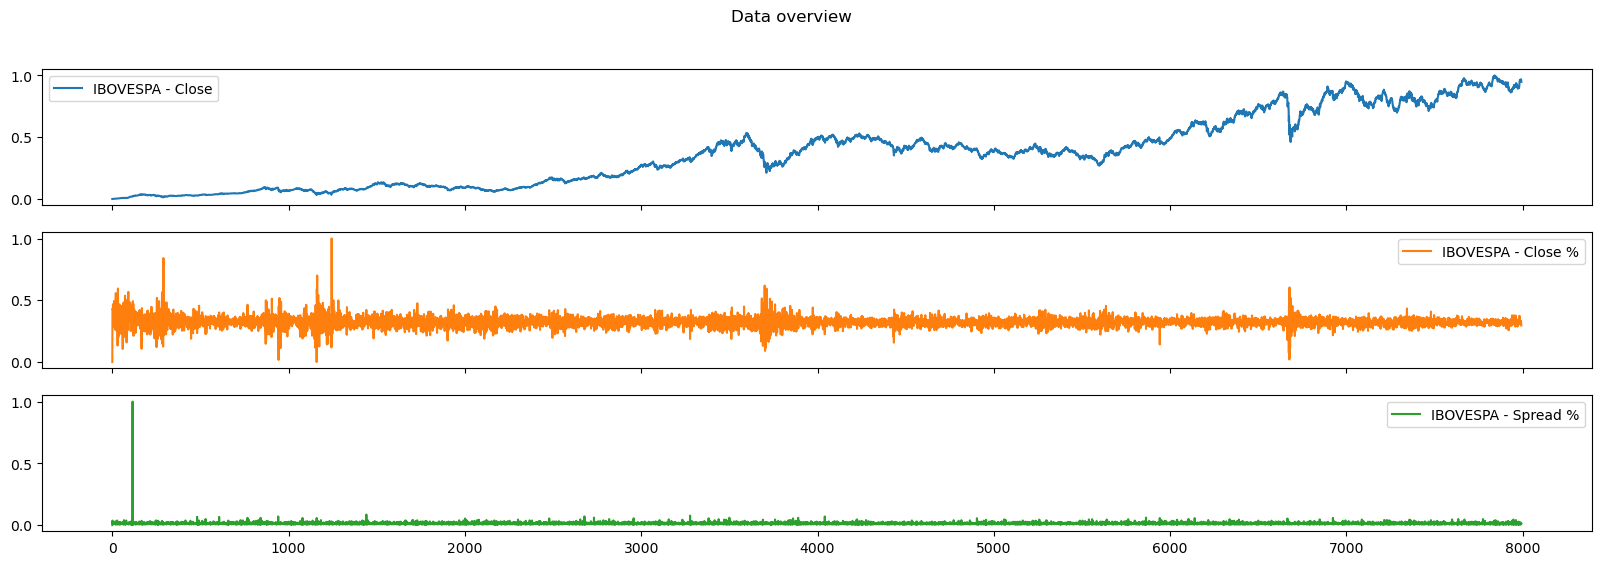

In [13]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

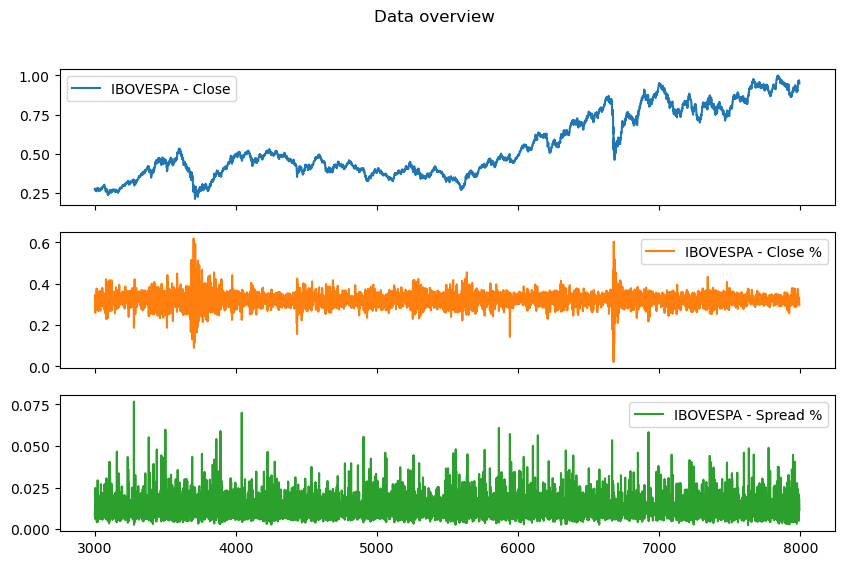

In [14]:
df_x_values[3000:].plot(subplots=True, figsize=(10, 2*len(df_x_values.columns)), title="Data overview") 

In [15]:
imported_df_cpy = imported_df.copy()
# remove the first column (index)
imported_df_cpy.reset_index(inplace=True)
# find date (index) of the 3050th row
print(imported_df_cpy.loc[3700, 'index'])
print(imported_df_cpy.loc[4860, 'index'])

2008-10-13
2013-03-27


Dividir os dados em treino e teste

In [16]:
valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
valid_indexes.head()
# find the first valid date for each column
# the index is the column name and the value is the value in "First Valid Index" column
valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
valid_indexes_dict

{'IBOVESPA - Close': '1994-01-03',
 'IBOVESPA - High': '1994-01-03',
 'IBOVESPA - Low': '1994-01-03',
 'IBOVESPA - Open': '1994-01-03',
 'Dólar - Close': '2003-12-01',
 'Dólar - High': '2003-12-01',
 'Dólar - Low': '2003-12-01',
 'Dólar - Open': '2003-12-01',
 'Dow Jones - Close': '1994-01-03',
 'Dow Jones - High': '1994-01-03',
 'Dow Jones - Low': '1994-01-03',
 'Dow Jones - Open': '1994-01-03',
 'S&P 500 - Close': '1994-01-03',
 'S&P 500 - High': '1994-01-03',
 'S&P 500 - Low': '1994-01-03',
 'S&P 500 - Open': '1994-01-03',
 'Nasdaq - Close': '1994-01-03',
 'Nasdaq - High': '1994-01-03',
 'Nasdaq - Low': '1994-01-03',
 'Nasdaq - Open': '1994-01-03',
 'Shanghai SE - Close': '1997-07-02',
 'Shanghai SE - High': '1997-07-02',
 'Shanghai SE - Low': '1997-07-02',
 'Shanghai SE - Open': '1997-07-02',
 'Nikkei - Close': '1994-01-04',
 'Nikkei - High': '1994-01-04',
 'Nikkei - Low': '1994-01-04',
 'Nikkei - Open': '1994-01-04',
 'HanSeng Index - Close': '1994-01-03',
 'HanSeng Index - High':

In [17]:
if START_ON_FIRST_VALID_DATE:
    # get valid indexes 
    valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
    valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
    valid_indexes_dict
    biggest_valid_index = min(valid_indexes_dict.values())
    for col in df_x_values.columns:
        # get the first valid index for each column
        first_valid_index = valid_indexes_dict[col]
        # check if the first valid index is greater than the biggest valid index
        if first_valid_index > biggest_valid_index:
            biggest_valid_index = first_valid_index
    # filter the dataframe to start on the first valid index, first finding the numeric index searching imported_df
    imported_df_cp = imported_df.copy()
    # reset the index
    imported_df_cp.reset_index(inplace=True)
    # find the first valid index
    first_valid_index = imported_df_cp[imported_df_cp['index'] == biggest_valid_index].index[0]
    print(f"First valid index: {first_valid_index}")

if START_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the START_DATE
    start_index = imported_df_cp[imported_df_cp['index'] == START_DATE].index[0]

if END_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the END_DATE
    end_index = imported_df_cp[imported_df_cp['index'] == END_DATE].index[0]

# crop the dataframe to start on the first valid index
if START_ON_FIRST_VALID_DATE and START_DATE is not None:
    if first_valid_index > start_index:
        # crop the dataframe to start on the first valid index
        df_x_values = df_x_values[first_valid_index:]
    else:
        # crop the dataframe to start on the START_DATE
        df_x_values = df_x_values[start_index:]
elif START_ON_FIRST_VALID_DATE:
    # crop the dataframe to start on the first valid index
    df_x_values = df_x_values[first_valid_index:]
elif START_DATE is not None:
    # crop the dataframe to start on the START_DATE
    df_x_values = df_x_values[start_index:]

# crop the dataframe to end on the END_DATE
if END_DATE is not None:
    # crop the dataframe to end on the END_DATE
    df_x_values = df_x_values[:end_index]
    # crop imported_df_cp to end on the END_DATE
    imported_df_cp = imported_df_cp[:end_index]

# calculate de size of training, validation and testing data
if TYPE_OF_UNIT == "percentual":
    train_size = int(len(df_x_values) * TRAINING_SIZE)
    validation_size = int(len(df_x_values) * VALIDATION_SIZE)
    test_size = int(len(df_x_values) * TESTING_SIZE)
elif TYPE_OF_UNIT == "days":
    train_size = TRAINING_SIZE
    validation_size = VALIDATION_SIZE
    test_size = TESTING_SIZE
elif TYPE_OF_UNIT == "weeks":
    train_size = TRAINING_SIZE * 7
    validation_size = VALIDATION_SIZE * 7
    test_size = TESTING_SIZE * 7
elif TYPE_OF_UNIT == "months":
    train_size = TRAINING_SIZE * 30
    validation_size = VALIDATION_SIZE * 30
    test_size = TESTING_SIZE * 30
elif TYPE_OF_UNIT == "customDays":
    # if iported_df_cp is not defined, define it
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # if TRAINING_SIZE is not in imported_df_cp, find the next closest date
    if TRAINING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TRAINING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Training date not found. Closest date to {TRAINING_SIZE} is {closest_date}")
        # set TRAINING_SIZE to the closest date
        TRAINING_SIZE = closest_date
    # if VALIDATION_SIZE is not in imported_df_cp, find the next closest date
    if VALIDATION_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > VALIDATION_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Validation date not found. Closest date to {VALIDATION_SIZE} is {closest_date}")
        # set VALIDATION_SIZE to the closest date
        VALIDATION_SIZE = closest_date
    # if TESTING_SIZE is not in imported_df_cp, find the next closest date
    if TESTING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TESTING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Testing date not found. Closest date to {TESTING_SIZE} is {closest_date}")
        # set TESTING_SIZE to the closest date
        TESTING_SIZE = closest_date
    
    # if VALIDATION_SIZE is not in imported_df_cp, throw error
    # get the index of TRAINING_SIZE date
    train_index = imported_df_cp[imported_df_cp['index'] == TRAINING_SIZE].index[0]
    # get the index of VALIDATION_SIZE date
    validation_index = imported_df_cp[imported_df_cp['index'] == VALIDATION_SIZE].index[0]
    # get the index of TESTING_SIZE date
    test_index = imported_df_cp[imported_df_cp['index'] == TESTING_SIZE].index[0] 
    # throw error if some of the indexes is not valid
    if train_index < 0 or validation_index < 0 or test_index < 0:
        raise ValueError("Some of the indexes are not valid.")
    # thow error if the indexes are not in the same order
    if train_index > validation_index or validation_index > test_index:
        raise ValueError("The indexes are not in the same order.")
    # calculate the size of the training, validation and testing data
    train_size = len(imported_df_cp[train_index:validation_index])
    validation_size = len(imported_df_cp[validation_index:test_index])
    test_size = len(imported_df_cp[test_index:])
else:
    raise ValueError("Invalid type_of_unit. Must be 'days', 'weeks', 'months' or 'percentual'.")

if START_ON_FIRST_VALID_DATE:
    # if train_size+validation_size+test_size is greater than the size of the dataframe, adjust train_size
    # to be the size of the dataframe minus validation_size and test_size
    if train_size + validation_size + test_size > len(df_x_values):
        # adjust train_size to be the size of the dataframe minus validation_size and test_size
        train_size = len(df_x_values) - validation_size - test_size
        print(f"Adjusted train size: {train_size}")
    # check if train_size is less than 0
    if train_size < 0:
        raise ValueError("Train size is less than 0. Please check the sizes of the data.")

# check if sum of sizes is less than the size of the dataframe
if train_size + validation_size + test_size > len(df_x_values):
    raise ValueError("Sum of train, validate and test sizes is greater than the size of the dataframe.")

# create the train, validation and test dataframes
train_df = df_x_values[-(train_size + test_size + validation_size):-(test_size + validation_size)]
val_df = df_x_values[-(test_size + validation_size):-test_size]
test_df = df_x_values[-(test_size):]

# check the size of the data
print(f"Training data size: {len(train_df)}")
print(f"Validating data size: {len(val_df)}")
print(f"Testing data size: {len(test_df)}")


First valid index: 1
Validation date not found. Closest date to 2023-10-01 is 2023-10-02
Adjusted train size: 7602
Training data size: 7602
Validating data size: 261
Testing data size: 129


array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

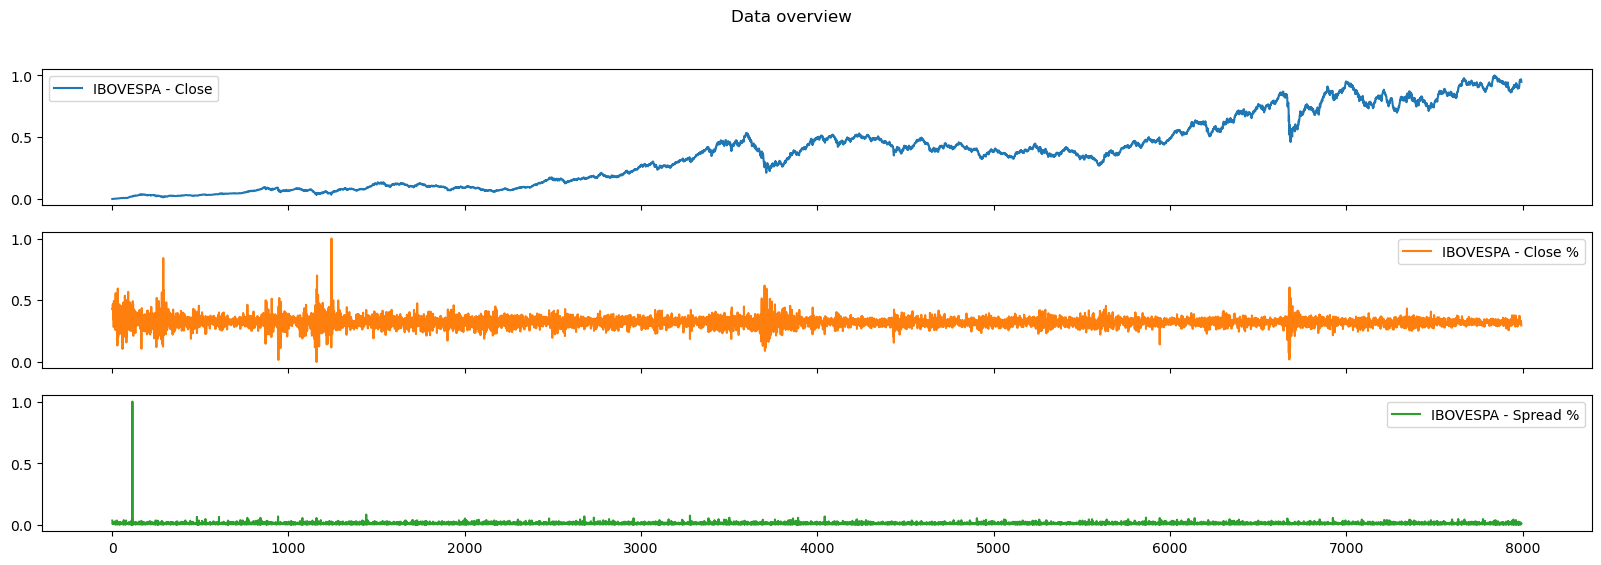

In [18]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

In [19]:
len(train_df), len(val_df), len(test_df), len(df_x_values)

(7602, 261, 129, 7992)

Criar a classe/função geradora das janelas

In [20]:
class WindowGenerator():
  def __init__(self, INPUT_WINDOW_SIZE, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.INPUT_WINDOW_SIZE = INPUT_WINDOW_SIZE
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = INPUT_WINDOW_SIZE + shift

    self.input_slice = slice(0, INPUT_WINDOW_SIZE)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
  
  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.INPUT_WINDOW_SIZE, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='IBOVESPA - Close', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for i in range(max_n):
      n = i#random.randint(0, len(inputs)-1)
      plt.subplot(max_n, 1, i+1)
      plt.ylabel(f'{plot_col} ({n}) [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [day]')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False,
        # shuffle=True,
        seed=RANDOM_SEED,
        batch_size=BATCH_SIZE,)

    ds = ds.map(self.split_window)

    return ds

  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)
  
  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.test))
      # And cache it for next time
      self._example = result
    return result

Criar função de erro customizado, aumentando o peso de previsões na direção incorreta

In [21]:
import keras.backend as K
import tensorflow as tf

def custom_loss(y_true, y_pred):
    threshold = 0.5955062488  # Define the threshold

    # Calculate the error between the true and predicted values
    error = y_true - y_pred
    
    # Determine the direction (increase or decrease) for both true and predicted values
    true_direction = tf.cast(tf.greater(y_true, threshold), tf.float32)  # 1 if true value is above threshold (increase), 0 if below (decrease)
    pred_direction = tf.cast(tf.greater(y_pred, threshold), tf.float32)  # 1 if predicted value is above threshold (increase), 0 if below (decrease)
    
    # Check for mismatches: wrong direction between true and predicted
    direction_mismatch = tf.abs(true_direction - pred_direction)  # 1 if directions mismatch, 0 if they match
    
    # Calculate the weighted error: apply a higher penalty when directions mismatch
    loss = tf.square(error) * (1 + MISMATCH_PENALITY * direction_mismatch)  # 5x penalty for mismatch, adjust factor as needed
    
    # Return the mean of the loss over all samples
    return tf.reduce_mean(loss)


Total window size: 5
Input indices: [0 1 2 3]
Label indices: [4]
Label column name(s): ['IBOVESPA - Close']

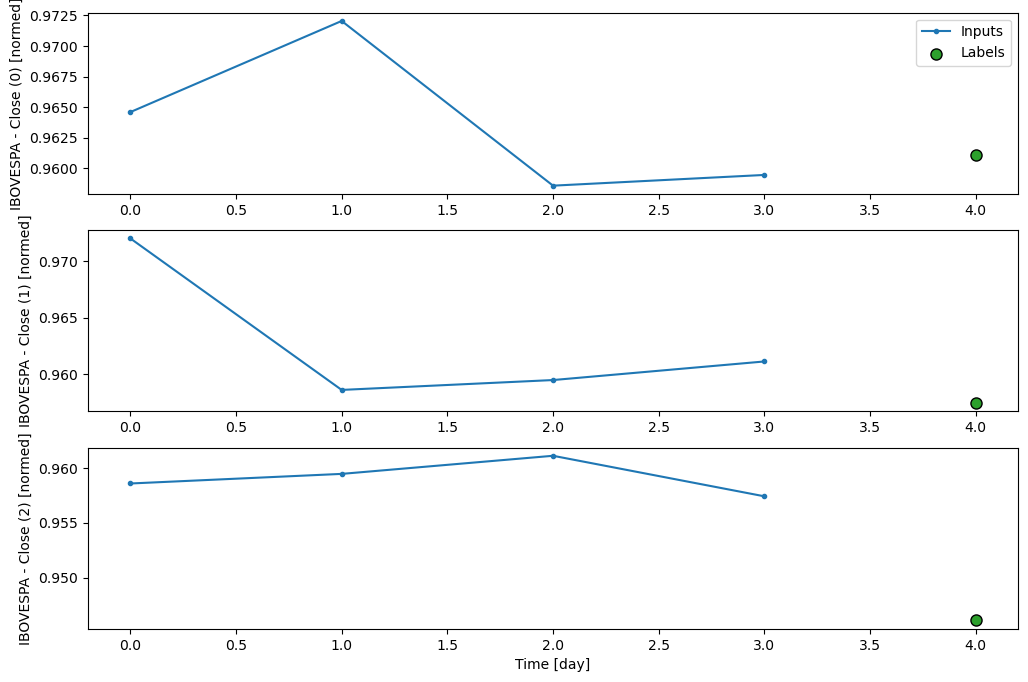

In [22]:
multi_window = WindowGenerator(INPUT_WINDOW_SIZE=INPUT_WINDOW_SIZE,
                               label_width=OUTPUT_WINDOW_SIZE,
                               shift=OUTPUT_WINDOW_SIZE, label_columns=[COLUMN_TO_PREDICT])

multi_window.plot(plot_col=COLUMN_TO_PREDICT)
multi_window

Criação da função de treino da rede

In [23]:
def compile_and_fit(model, window, PATIENCE=2, MAX_EPOCHS=150, LEARNING_RATE=0.00001):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=PATIENCE,
                                                    mode='min')
  
  # optimizer using learning rate schedule 
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=LEARNING_RATE,
    decay_steps=DECAY_STEPS,
    decay_rate=LEARNING_DECAY)

  # config optimizer
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
  
  # callback to print the learning rate and add it to the history
  class PrintLR(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
      lr = float(tf.keras.backend.get_value(self.model.optimizer.learning_rate))
      # print(f'Learning rate at epoch {epoch + 1}: {lr:.6f}')
      # add the learning rate to the history
      logs['lr'] = lr
  printlr = PrintLR()
  
  # config loss function
  if LOSS_FUNCTION == 'MAE':
    loss_function = tf.keras.losses.MeanAbsoluteError()
  elif LOSS_FUNCTION == 'MSE':
    loss_function = tf.keras.losses.MeanSquaredError()
  # elif LOSS_FUNCTION == 'CUSTOM':
  #   loss_function = custom_loss

  # model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
  # model.compile(loss=tf.keras.losses.MeanSquaredError(),
  # model.compile(loss=custom_loss,
  model.compile(
                loss=loss_function,
                optimizer=optimizer,
                metrics=[
                  tf.keras.metrics.MeanAbsoluteError(),
                  tf.keras.metrics.MeanSquaredError(),
                  tf.keras.metrics.MeanAbsolutePercentageError(),
                  tf.keras.metrics.RootMeanSquaredError(),
                  # tf.keras.metrics.R2Score()
                  ]
              )

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[printlr, early_stopping])
  return history

Definir modelo da rede e realizar o treinamento

In [24]:
multi_window.train

<_MapDataset element_spec=(TensorSpec(shape=(None, 4, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))>

# Definir modelos

In [25]:
num_features = df_x_values.shape[1]

num_features

3

In [26]:
def get_model():
    if NUM_FEATURES is not None:
        num_features = NUM_FEATURES
    else:
        num_features = df_x_values.shape[1]
    
    if MODEL_TO_USE == 1:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 2:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=True), 
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 3:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(100, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model

Calculate metrics

In [27]:
# create dataframe for "hard" predictions
def create_df_repeat_prediction(data):        
    # predictions = data[COLUMN_TO_PREDICT].values[:-1]
    # labels = data[COLUMN_TO_PREDICT].values[1:]
    predictions, labels = None, None
    for part in iter(data):
        # print(part)
        if predictions is None:
            labels = part[1]
        else:
            labels = np.concatenate((labels, part[1]), axis=0)
    labels = labels[:, :, 0]
    # convert labels to 1D array
    # print(labels.shape)
    # print(labels)
    predictions = labels
    for i, label in enumerate(labels[:-1]):
        # if i == 3:
        #     break
        for j in range(len(label)):
            # replace values of predictions[i] with the first value of label
            predictions = tf.tensor_scatter_nd_update(
                predictions, 
                [[i, j]], 
                [label[0]]
            )
        # print(f"Label {i}: {label}")
        # print(f"Prediction {i}: {predictions[i]}")
    predictions = predictions[:-1]    
    labels = labels[1:]
    return {"predictions": predictions, "labels": labels}
    predictions_df = pd.DataFrame({"predictions": predictions, "labels": labels})
    predictions_df = predictions_df.dropna()
    return predictions_df

In [28]:
def make_repeat_predictions_metrics(data):
    predictions = create_df_repeat_prediction(data)
    mae = tf.keras.metrics.MeanAbsoluteError()
    mae.update_state(predictions["labels"], predictions["predictions"])
    mse = tf.keras.metrics.MeanSquaredError()
    mse.update_state(predictions["labels"], predictions["predictions"])
    mape = tf.keras.metrics.MeanAbsolutePercentageError()
    mape.update_state(predictions["labels"], predictions["predictions"])
    rmse = tf.keras.metrics.RootMeanSquaredError()
    rmse.update_state(predictions["labels"], predictions["predictions"])
    print(f"MAE: {mae.result()} - MSE: {mse.result()} - MAPE: {mape.result()} - RMSE: {rmse.result()}")
    return {
            "Loss": None,
            "MAE": float(mae.result()),
            "MSE": float(mse.result()),
            "MAPE": float(mape.result()),
            "RMSE": float(rmse.result()),
        }


In [29]:
def make_model_predictions_metrics(model, data):
    loss, mae, mse, mape, rmse = model.evaluate(data)
    print(f"Loss: {loss} - MAE: {mae} - MSE: {mse} - MAPE: {mape} - RMSE: {rmse}")
    return {
            "Loss": loss,
            "MAE": mae,
            "MSE": mse,
            "MAPE": mape,
            "RMSE": rmse,
        }

Treinar modelos

In [30]:
# record start time
training_start = time.time()

model = get_model()

history = compile_and_fit(model, multi_window, PATIENCE, MAX_EPOCHS, LEARNING_RATE)

# record end time
training_end = time.time()

Epoch 1/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9:12 2s/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 100.0000 - mean_squared_error: 1.0882e-05 - root_mean_squared_error: 0.0033

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 91.5852 - mean_squared_error: 2.0129e-04 - root_mean_squared_error: 0.0136  

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 69.5207 - mean_squared_error: 1.7577e-04 - root_mean_squared_error: 0.0129

 36/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 60.0739 - mean_squared_error: 1.7743e-04 - root_mean_squared_error: 0.0131

 47/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 53.6927 - mean_squared_error: 1.9294e-04 - root_mean_squared_error: 0.0136

 60/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 48.7489 - mean_squared_error: 2.2999e-04 - root_mean_squared_error: 0.0148

 72/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 45.2085 - mean_squared_error: 2.4748e-04 - root_mean_squared_error: 0.0154

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 42.3581 - mean_squared_error: 2.7090e-04 - root_mean_squared_error: 0.0161

 98/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 39.9621 - mean_squared_error: 2.9474e-04 - root_mean_squared_error: 0.0168

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 37.9327 - mean_squared_error: 3.2546e-04 - root_mean_squared_error: 0.0176

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 36.3415 - mean_squared_error: 3.7880e-04 - root_mean_squared_error: 0.0187

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 35.0238 - mean_squared_error: 6.2131e-04 - root_mean_squared_error: 0.0221

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 33.9130 - mean_squared_error: 8.8565e-04 - root_mean_squared_error: 0.0254

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 32.9852 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0280    

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 32.1349 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0302

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 31.3548 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0321

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 30.6499 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0338

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 29.9382 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0355

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 29.2970 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0374

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 28.6938 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0391

238/238 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 28.5596 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0395 - val_loss: 0.1674 - val_mean_absolute_error: 0.1674 - val_mean_absolute_percentage_error: 17.9744 - val_mean_squared_error: 0.0293 - val_root_mean_squared_error: 0.1710 - lr: 0.0098


Epoch 2/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.6033 - mean_absolute_error: 0.6033 - mean_absolute_percentage_error: 26050.3984 - mean_squared_error: 0.3640 - root_mean_squared_error: 0.6033

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5546 - mean_absolute_error: 0.5546 - mean_absolute_percentage_error: 9471.1211 - mean_squared_error: 0.3118 - root_mean_squared_error: 0.5572  

 25/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4601 - mean_absolute_error: 0.4601 - mean_absolute_percentage_error: 6434.7910 - mean_squared_error: 0.2431 - root_mean_squared_error: 0.4862

 37/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3871 - mean_absolute_error: 0.3871 - mean_absolute_percentage_error: 4978.2764 - mean_squared_error: 0.1978 - root_mean_squared_error: 0.4327

 50/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3317 - mean_absolute_error: 0.3317 - mean_absolute_percentage_error: 4046.7065 - mean_squared_error: 0.1656 - root_mean_squared_error: 0.3908

 63/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2915 - mean_absolute_error: 0.2915 - mean_absolute_percentage_error: 3433.8267 - mean_squared_error: 0.1432 - root_mean_squared_error: 0.3594

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2611 - mean_absolute_error: 0.2611 - mean_absolute_percentage_error: 2996.7800 - mean_squared_error: 0.1266 - root_mean_squared_error: 0.3347

 88/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2390 - mean_absolute_error: 0.2390 - mean_absolute_percentage_error: 2689.9285 - mean_squared_error: 0.1147 - root_mean_squared_error: 0.3161

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2195 - mean_absolute_error: 0.2195 - mean_absolute_percentage_error: 2427.2520 - mean_squared_error: 0.1044 - root_mean_squared_error: 0.2992

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2036 - mean_absolute_error: 0.2036 - mean_absolute_percentage_error: 2215.6509 - mean_squared_error: 0.0959 - root_mean_squared_error: 0.2849

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1910 - mean_absolute_error: 0.1910 - mean_absolute_percentage_error: 2041.3560 - mean_squared_error: 0.0890 - root_mean_squared_error: 0.2729

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1804 - mean_absolute_error: 0.1804 - mean_absolute_percentage_error: 1894.9114 - mean_squared_error: 0.0831 - root_mean_squared_error: 0.2625

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1713 - mean_absolute_error: 0.1713 - mean_absolute_percentage_error: 1769.9230 - mean_squared_error: 0.0780 - root_mean_squared_error: 0.2532

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1633 - mean_absolute_error: 0.1633 - mean_absolute_percentage_error: 1661.8435 - mean_squared_error: 0.0736 - root_mean_squared_error: 0.2450

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1562 - mean_absolute_error: 0.1562 - mean_absolute_percentage_error: 1567.3699 - mean_squared_error: 0.0698 - root_mean_squared_error: 0.2375

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1504 - mean_absolute_error: 0.1504 - mean_absolute_percentage_error: 1490.0968 - mean_squared_error: 0.0666 - root_mean_squared_error: 0.2313

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1457 - mean_absolute_error: 0.1457 - mean_absolute_percentage_error: 1426.2903 - mean_squared_error: 0.0639 - root_mean_squared_error: 0.2260

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1418 - mean_absolute_error: 0.1418 - mean_absolute_percentage_error: 1373.2811 - mean_squared_error: 0.0617 - root_mean_squared_error: 0.2216

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1373 - mean_absolute_error: 0.1373 - mean_absolute_percentage_error: 1310.5310 - mean_squared_error: 0.0592 - root_mean_squared_error: 0.2163

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1332 - mean_absolute_error: 0.1332 - mean_absolute_percentage_error: 1253.7772 - mean_squared_error: 0.0568 - root_mean_squared_error: 0.2115

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1329 - mean_absolute_error: 0.1329 - mean_absolute_percentage_error: 1249.6411 - mean_squared_error: 0.0567 - root_mean_squared_error: 0.2111 - val_loss: 0.0644 - val_mean_absolute_error: 0.0644 - val_mean_absolute_percentage_error: 6.8475 - val_mean_squared_error: 0.0049 - val_root_mean_squared_error: 0.0700 - lr: 0.0095


Epoch 3/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.4730 - mean_absolute_error: 0.4730 - mean_absolute_percentage_error: 20400.7559 - mean_squared_error: 0.2238 - root_mean_squared_error: 0.4730

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4434 - mean_absolute_error: 0.4434 - mean_absolute_percentage_error: 7190.1157 - mean_squared_error: 0.1987 - root_mean_squared_error: 0.4451  

 27/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3761 - mean_absolute_error: 0.3761 - mean_absolute_percentage_error: 4899.9878 - mean_squared_error: 0.1579 - root_mean_squared_error: 0.3928

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3244 - mean_absolute_error: 0.3244 - mean_absolute_percentage_error: 3864.5325 - mean_squared_error: 0.1315 - root_mean_squared_error: 0.3544

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2821 - mean_absolute_error: 0.2821 - mean_absolute_percentage_error: 3178.2209 - mean_squared_error: 0.1117 - root_mean_squared_error: 0.3230

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2524 - mean_absolute_error: 0.2524 - mean_absolute_percentage_error: 2747.1919 - mean_squared_error: 0.0985 - root_mean_squared_error: 0.3004

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2272 - mean_absolute_error: 0.2272 - mean_absolute_percentage_error: 2405.9089 - mean_squared_error: 0.0876 - root_mean_squared_error: 0.2807

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2072 - mean_absolute_error: 0.2072 - mean_absolute_percentage_error: 2147.1038 - mean_squared_error: 0.0790 - root_mean_squared_error: 0.2646

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1909 - mean_absolute_error: 0.1909 - mean_absolute_percentage_error: 1943.2871 - mean_squared_error: 0.0722 - root_mean_squared_error: 0.2511

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1783 - mean_absolute_error: 0.1783 - mean_absolute_percentage_error: 1789.7169 - mean_squared_error: 0.0669 - root_mean_squared_error: 0.2403

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1668 - mean_absolute_error: 0.1668 - mean_absolute_percentage_error: 1650.9757 - mean_squared_error: 0.0621 - root_mean_squared_error: 0.2302

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1576 - mean_absolute_error: 0.1576 - mean_absolute_percentage_error: 1542.4218 - mean_squared_error: 0.0584 - root_mean_squared_error: 0.2219

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1490 - mean_absolute_error: 0.1490 - mean_absolute_percentage_error: 1441.2877 - mean_squared_error: 0.0548 - root_mean_squared_error: 0.2140

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1415 - mean_absolute_error: 0.1415 - mean_absolute_percentage_error: 1353.7698 - mean_squared_error: 0.0517 - root_mean_squared_error: 0.2068

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1349 - mean_absolute_error: 0.1349 - mean_absolute_percentage_error: 1277.2207 - mean_squared_error: 0.0490 - root_mean_squared_error: 0.2004

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1290 - mean_absolute_error: 0.1290 - mean_absolute_percentage_error: 1209.6526 - mean_squared_error: 0.0465 - root_mean_squared_error: 0.1946

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1242 - mean_absolute_error: 0.1242 - mean_absolute_percentage_error: 1153.9023 - mean_squared_error: 0.0445 - root_mean_squared_error: 0.1897

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1195 - mean_absolute_error: 0.1195 - mean_absolute_percentage_error: 1099.5510 - mean_squared_error: 0.0426 - root_mean_squared_error: 0.1848

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1154 - mean_absolute_error: 0.1154 - mean_absolute_percentage_error: 1050.5590 - mean_squared_error: 0.0408 - root_mean_squared_error: 0.1804

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1137 - mean_absolute_error: 0.1137 - mean_absolute_percentage_error: 1029.5330 - mean_squared_error: 0.0400 - root_mean_squared_error: 0.1785

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1128 - mean_absolute_error: 0.1128 - mean_absolute_percentage_error: 1019.3719 - mean_squared_error: 0.0397 - root_mean_squared_error: 0.1775 - val_loss: 0.0145 - val_mean_absolute_error: 0.0145 - val_mean_absolute_percentage_error: 1.5985 - val_mean_squared_error: 3.6955e-04 - val_root_mean_squared_error: 0.0192 - lr: 0.0093


Epoch 4/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.2772 - mean_absolute_error: 0.2772 - mean_absolute_percentage_error: 11949.2500 - mean_squared_error: 0.0768 - root_mean_squared_error: 0.2772

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2560 - mean_absolute_error: 0.2560 - mean_absolute_percentage_error: 4970.7012 - mean_squared_error: 0.0665 - root_mean_squared_error: 0.2573  

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2296 - mean_absolute_error: 0.2296 - mean_absolute_percentage_error: 3808.9758 - mean_squared_error: 0.0568 - root_mean_squared_error: 0.2364

 22/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2081 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 3140.9495 - mean_squared_error: 0.0496 - root_mean_squared_error: 0.2193

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1823 - mean_absolute_error: 0.1823 - mean_absolute_percentage_error: 2520.4438 - mean_squared_error: 0.0417 - root_mean_squared_error: 0.1990

 41/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1609 - mean_absolute_error: 0.1609 - mean_absolute_percentage_error: 2088.4648 - mean_squared_error: 0.0356 - root_mean_squared_error: 0.1820

 51/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1444 - mean_absolute_error: 0.1444 - mean_absolute_percentage_error: 1794.7754 - mean_squared_error: 0.0312 - root_mean_squared_error: 0.1688

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1290 - mean_absolute_error: 0.1290 - mean_absolute_percentage_error: 1544.1080 - mean_squared_error: 0.0273 - root_mean_squared_error: 0.1563

 72/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1196 - mean_absolute_error: 0.1196 - mean_absolute_percentage_error: 1401.7419 - mean_squared_error: 0.0250 - root_mean_squared_error: 0.1486

 80/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1126 - mean_absolute_error: 0.1126 - mean_absolute_percentage_error: 1297.6769 - mean_squared_error: 0.0233 - root_mean_squared_error: 0.1426

 88/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1065 - mean_absolute_error: 0.1065 - mean_absolute_percentage_error: 1209.4694 - mean_squared_error: 0.0218 - root_mean_squared_error: 0.1374

 98/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0999 - mean_absolute_error: 0.0999 - mean_absolute_percentage_error: 1116.2883 - mean_squared_error: 0.0203 - root_mean_squared_error: 0.1317

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0949 - mean_absolute_error: 0.0949 - mean_absolute_percentage_error: 1045.0587 - mean_squared_error: 0.0191 - root_mean_squared_error: 0.1271

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0919 - mean_absolute_error: 0.0919 - mean_absolute_percentage_error: 1002.9202 - mean_squared_error: 0.0184 - root_mean_squared_error: 0.1243

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0875 - mean_absolute_error: 0.0875 - mean_absolute_percentage_error: 940.4918 - mean_squared_error: 0.0173 - root_mean_squared_error: 0.1201 

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0841 - mean_absolute_error: 0.0841 - mean_absolute_percentage_error: 891.2455 - mean_squared_error: 0.0165 - root_mean_squared_error: 0.1168

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0807 - mean_absolute_error: 0.0807 - mean_absolute_percentage_error: 842.8094 - mean_squared_error: 0.0156 - root_mean_squared_error: 0.1134

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0777 - mean_absolute_error: 0.0777 - mean_absolute_percentage_error: 799.8494 - mean_squared_error: 0.0149 - root_mean_squared_error: 0.1103

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0749 - mean_absolute_error: 0.0749 - mean_absolute_percentage_error: 761.4545 - mean_squared_error: 0.0142 - root_mean_squared_error: 0.1075

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0724 - mean_absolute_error: 0.0724 - mean_absolute_percentage_error: 726.9129 - mean_squared_error: 0.0136 - root_mean_squared_error: 0.1049

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0700 - mean_absolute_error: 0.0700 - mean_absolute_percentage_error: 695.6557 - mean_squared_error: 0.0131 - root_mean_squared_error: 0.1025

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0679 - mean_absolute_error: 0.0679 - mean_absolute_percentage_error: 667.2215 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1002

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0663 - mean_absolute_error: 0.0663 - mean_absolute_percentage_error: 646.2496 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.0985

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0643 - mean_absolute_error: 0.0643 - mean_absolute_percentage_error: 619.6730 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.0963

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0625 - mean_absolute_error: 0.0625 - mean_absolute_percentage_error: 595.3987 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.0943

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0610 - mean_absolute_error: 0.0610 - mean_absolute_percentage_error: 575.0784 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.0927

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0600 - mean_absolute_error: 0.0600 - mean_absolute_percentage_error: 561.7422 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.0915 - val_loss: 0.0161 - val_mean_absolute_error: 0.0161 - val_mean_absolute_percentage_error: 1.7147 - val_mean_squared_error: 3.5679e-04 - val_root_mean_squared_error: 0.0189 - lr: 0.0090


Epoch 5/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.1270 - mean_absolute_error: 0.1270 - mean_absolute_percentage_error: 5481.7764 - mean_squared_error: 0.0161 - root_mean_squared_error: 0.1271

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0974 - mean_absolute_error: 0.0974 - mean_absolute_percentage_error: 2081.6365 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.1022 

 22/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0783 - mean_absolute_error: 0.0783 - mean_absolute_percentage_error: 1365.7299 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0857

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0715 - mean_absolute_error: 0.0715 - mean_absolute_percentage_error: 1167.2292 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0797

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0622 - mean_absolute_error: 0.0622 - mean_absolute_percentage_error: 932.7896 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0715 

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0560 - mean_absolute_error: 0.0560 - mean_absolute_percentage_error: 795.3760 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0661

 59/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 696.6534 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0618

 70/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 615.3867 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0579

 79/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 563.1331 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0553

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 515.5292 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0528

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 472.4887 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0504

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0366 - mean_absolute_error: 0.0366 - mean_absolute_percentage_error: 436.7280 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0483

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 406.5046 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0466

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0336 - mean_absolute_error: 0.0336 - mean_absolute_percentage_error: 382.8073 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0453

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 370.0072 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0445

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 347.0536 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0432

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 330.1936 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0422

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 313.6175 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0412

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 300.0642 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0404

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 287.7436 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0396

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 275.4165 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0388

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 264.1991 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0380

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 258.4946 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0376

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 249.5669 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0370

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 241.2945 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0364 - val_loss: 0.0085 - val_mean_absolute_error: 0.0085 - val_mean_absolute_percentage_error: 0.9374 - val_mean_squared_error: 1.1124e-04 - val_root_mean_squared_error: 0.0105 - lr: 0.0088


Epoch 6/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.1279 - mean_absolute_error: 0.1279 - mean_absolute_percentage_error: 5521.3867 - mean_squared_error: 0.0164 - root_mean_squared_error: 0.1279

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1004 - mean_absolute_error: 0.1004 - mean_absolute_percentage_error: 2105.5188 - mean_squared_error: 0.0112 - root_mean_squared_error: 0.1046 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0835 - mean_absolute_error: 0.0835 - mean_absolute_percentage_error: 1467.4302 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0902

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0729 - mean_absolute_error: 0.0729 - mean_absolute_percentage_error: 1154.0388 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0810

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0642 - mean_absolute_error: 0.0642 - mean_absolute_percentage_error: 944.1352 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0736 

 50/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0572 - mean_absolute_error: 0.0572 - mean_absolute_percentage_error: 793.6821 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0675

 62/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 680.3498 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0624

 71/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 616.4092 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0592

 79/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 569.8799 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0568

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 517.3209 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0540

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 478.0642 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0518

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 447.9752 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0500

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 427.3226 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0488

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0350 - mean_absolute_error: 0.0350 - mean_absolute_percentage_error: 403.6788 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0473

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 391.7521 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0466

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0332 - mean_absolute_error: 0.0332 - mean_absolute_percentage_error: 376.3065 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0456

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 362.1499 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0447

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 340.4337 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0433

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 321.4067 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0420

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 304.5839 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0408

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 288.4165 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0396

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 275.0800 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0386

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 262.0819 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0377

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 250.3671 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0368

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 243.7149 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0363 - val_loss: 0.0084 - val_mean_absolute_error: 0.0084 - val_mean_absolute_percentage_error: 0.9076 - val_mean_squared_error: 1.1027e-04 - val_root_mean_squared_error: 0.0105 - lr: 0.0086


Epoch 7/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.1122 - mean_absolute_error: 0.1122 - mean_absolute_percentage_error: 4847.3667 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1123

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0817 - mean_absolute_error: 0.0817 - mean_absolute_percentage_error: 1665.5134 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0868 

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0637 - mean_absolute_error: 0.0637 - mean_absolute_percentage_error: 1076.7380 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0714

 38/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0540 - mean_absolute_error: 0.0540 - mean_absolute_percentage_error: 832.2980 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0629 

 51/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 676.2587 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0566

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 573.7669 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0519

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 505.6397 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0485

 87/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 457.2485 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0460

 97/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 421.3603 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0440

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 391.2044 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0423

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 363.0994 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0407

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 341.1599 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0393

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 320.1720 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0380

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 303.4174 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0370

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 292.7950 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0363

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 278.9677 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0354

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 272.5801 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0350

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 263.0056 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0343

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 250.9909 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0335

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 239.1894 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0327

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 230.2500 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0320

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 222.8141 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0316

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 215.8917 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0312

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 209.4300 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0308 - val_loss: 0.0105 - val_mean_absolute_error: 0.0105 - val_mean_absolute_percentage_error: 1.1180 - val_mean_squared_error: 1.6246e-04 - val_root_mean_squared_error: 0.0127 - lr: 0.0084


Epoch 8/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 4:53 1s/step - loss: 0.0952 - mean_absolute_error: 0.0952 - mean_absolute_percentage_error: 4117.0898 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0953

 12/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0704 - mean_absolute_error: 0.0704 - mean_absolute_percentage_error: 1481.0621 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0745 

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0575 - mean_absolute_error: 0.0575 - mean_absolute_percentage_error: 994.0197 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0632 

 34/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 768.3287 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0562

 46/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 624.1044 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0509

 59/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 523.1953 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0466

 69/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0360 - mean_absolute_error: 0.0360 - mean_absolute_percentage_error: 467.2073 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0440

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 435.3820 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0424

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 397.4742 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0405

 96/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 366.2382 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0388

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 347.4267 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0377

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 326.1770 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0365

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 303.8268 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0352

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 296.5237 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0348

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 289.6022 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0344

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 276.7840 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0336

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 263.7881 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0329

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 253.3192 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0323

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 242.5870 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0316

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 232.8141 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0310

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 220.1403 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0302

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 209.7199 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0295

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 201.0782 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0289

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 193.1871 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0284

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 185.9495 - mean_squared_error: 9.7523e-04 - root_mean_squared_error: 0.0279

238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 181.6479 - mean_squared_error: 9.5600e-04 - root_mean_squared_error: 0.0276 - val_loss: 0.0080 - val_mean_absolute_error: 0.0080 - val_mean_absolute_percentage_error: 0.8620 - val_mean_squared_error: 1.0007e-04 - val_root_mean_squared_error: 0.0100 - lr: 0.0082


Epoch 9/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 0.0939 - mean_absolute_error: 0.0939 - mean_absolute_percentage_error: 4054.8672 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0940

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0709 - mean_absolute_error: 0.0709 - mean_absolute_percentage_error: 1532.6392 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0747 

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0570 - mean_absolute_error: 0.0570 - mean_absolute_percentage_error: 1031.5659 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0628

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 816.3646 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0563 

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 707.5709 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0525

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 580.9727 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0475

 62/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0352 - mean_absolute_error: 0.0352 - mean_absolute_percentage_error: 490.4243 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0435

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 430.8067 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0407

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 392.1895 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0387

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 369.4336 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0375

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 341.5846 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0360

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 313.7400 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0344

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 288.7335 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0329

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 267.7715 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0317

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 249.9169 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0306

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 235.6151 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0297

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 227.0427 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0292

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 215.4014 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0284

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 204.1883 - mean_squared_error: 9.7739e-04 - root_mean_squared_error: 0.0277

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 194.9214 - mean_squared_error: 9.3770e-04 - root_mean_squared_error: 0.0270

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 187.8808 - mean_squared_error: 9.0870e-04 - root_mean_squared_error: 0.0266

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 179.5258 - mean_squared_error: 8.7520e-04 - root_mean_squared_error: 0.0261

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 175.3582 - mean_squared_error: 8.5855e-04 - root_mean_squared_error: 0.0259 - val_loss: 0.0066 - val_mean_absolute_error: 0.0066 - val_mean_absolute_percentage_error: 0.7092 - val_mean_squared_error: 6.7360e-05 - val_root_mean_squared_error: 0.0082 - lr: 0.0080


Epoch 10/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - loss: 0.0893 - mean_absolute_error: 0.0893 - mean_absolute_percentage_error: 3855.5310 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0893

  8/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0752 - mean_absolute_error: 0.0752 - mean_absolute_percentage_error: 1753.3035 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0770  

 18/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0574 - mean_absolute_error: 0.0574 - mean_absolute_percentage_error: 1082.5956 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0627

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 758.8918 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0530 

 43/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 605.2812 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0473

 55/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 507.9202 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0433

 68/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 435.2387 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0399

 80/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 386.0220 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0374

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 353.5411 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0357

 98/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 331.6182 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0345

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 314.7719 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0336

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 295.7114 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0325

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 275.6278 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0314

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 255.4697 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0302

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 238.3211 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0292

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 224.5972 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0284

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 213.4625 - mean_squared_error: 9.6716e-04 - root_mean_squared_error: 0.0277

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 203.4824 - mean_squared_error: 9.2670e-04 - root_mean_squared_error: 0.0270

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 194.4814 - mean_squared_error: 8.9027e-04 - root_mean_squared_error: 0.0264

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 187.0289 - mean_squared_error: 8.6044e-04 - root_mean_squared_error: 0.0260

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 180.8410 - mean_squared_error: 8.3614e-04 - root_mean_squared_error: 0.0256

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 176.3319 - mean_squared_error: 8.1865e-04 - root_mean_squared_error: 0.0253

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 170.8861 - mean_squared_error: 7.9759e-04 - root_mean_squared_error: 0.0250

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 166.3484 - mean_squared_error: 7.8009e-04 - root_mean_squared_error: 0.0247 - val_loss: 0.0096 - val_mean_absolute_error: 0.0096 - val_mean_absolute_percentage_error: 1.0246 - val_mean_squared_error: 1.3811e-04 - val_root_mean_squared_error: 0.0118 - lr: 0.0078


Epoch 11/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0788 - mean_absolute_error: 0.0788 - mean_absolute_percentage_error: 3403.4771 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0789

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0556 - mean_absolute_error: 0.0556 - mean_absolute_percentage_error: 1161.8737 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595 

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 817.2453 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0514 

 33/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 644.4398 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0462

 43/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0362 - mean_absolute_error: 0.0362 - mean_absolute_percentage_error: 537.3009 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0423

 53/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 463.6229 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0394

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 404.8153 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0368

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 364.1527 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0348

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 334.6387 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0333

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 307.5126 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0319

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 286.9626 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0308

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 267.4313 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0297

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 246.0518 - mean_squared_error: 9.7961e-04 - root_mean_squared_error: 0.0284

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 229.4199 - mean_squared_error: 9.2017e-04 - root_mean_squared_error: 0.0275

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 215.1012 - mean_squared_error: 8.6902e-04 - root_mean_squared_error: 0.0266

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 202.6282 - mean_squared_error: 8.2423e-04 - root_mean_squared_error: 0.0259

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 194.2735 - mean_squared_error: 7.9406e-04 - root_mean_squared_error: 0.0253

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 185.0417 - mean_squared_error: 7.6059e-04 - root_mean_squared_error: 0.0247

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 179.6554 - mean_squared_error: 7.4101e-04 - root_mean_squared_error: 0.0244

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 175.3070 - mean_squared_error: 7.2521e-04 - root_mean_squared_error: 0.0241

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 171.1854 - mean_squared_error: 7.1028e-04 - root_mean_squared_error: 0.0238

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 166.6398 - mean_squared_error: 6.9392e-04 - root_mean_squared_error: 0.0235

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 162.3545 - mean_squared_error: 6.7898e-04 - root_mean_squared_error: 0.0233

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 157.7470 - mean_squared_error: 6.6347e-04 - root_mean_squared_error: 0.0230

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 153.4201 - mean_squared_error: 6.4923e-04 - root_mean_squared_error: 0.0228

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 148.8563 - mean_squared_error: 6.3430e-04 - root_mean_squared_error: 0.0225 - val_loss: 0.0076 - val_mean_absolute_error: 0.0076 - val_mean_absolute_percentage_error: 0.8328 - val_mean_squared_error: 8.9494e-05 - val_root_mean_squared_error: 0.0095 - lr: 0.0076


Epoch 12/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.0775 - mean_absolute_error: 0.0775 - mean_absolute_percentage_error: 3347.2183 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0775

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0583 - mean_absolute_error: 0.0583 - mean_absolute_percentage_error: 1265.2958 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615 

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 857.2139 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0528 

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 665.8118 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0472

 41/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 550.4196 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0431

 51/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - mean_absolute_percentage_error: 472.2397 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0399

 60/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 420.3410 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0376

 70/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 375.7807 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0355

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 331.4714 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0332

 96/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 297.3925 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0314

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 274.0773 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0301

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 252.8546 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0288

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 234.9775 - mean_squared_error: 9.4074e-04 - root_mean_squared_error: 0.0278

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 219.6855 - mean_squared_error: 8.8457e-04 - root_mean_squared_error: 0.0268

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 206.4410 - mean_squared_error: 8.3569e-04 - root_mean_squared_error: 0.0260

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 193.9450 - mean_squared_error: 7.8933e-04 - root_mean_squared_error: 0.0252

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 183.0106 - mean_squared_error: 7.4855e-04 - root_mean_squared_error: 0.0244

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 174.0562 - mean_squared_error: 7.1504e-04 - root_mean_squared_error: 0.0238

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 165.3831 - mean_squared_error: 6.8255e-04 - root_mean_squared_error: 0.0232

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 157.6124 - mean_squared_error: 6.5409e-04 - root_mean_squared_error: 0.0227

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 151.6388 - mean_squared_error: 6.3256e-04 - root_mean_squared_error: 0.0223

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 147.5987 - mean_squared_error: 6.1810e-04 - root_mean_squared_error: 0.0220

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 147.1111 - mean_squared_error: 6.1636e-04 - root_mean_squared_error: 0.0220 - val_loss: 0.0072 - val_mean_absolute_error: 0.0072 - val_mean_absolute_percentage_error: 0.7704 - val_mean_squared_error: 8.1049e-05 - val_root_mean_squared_error: 0.0090 - lr: 0.0074


Epoch 13/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.0541 - mean_absolute_error: 0.0541 - mean_absolute_percentage_error: 2337.1519 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0541

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 972.3243 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0424  

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0338 - mean_absolute_error: 0.0338 - mean_absolute_percentage_error: 718.4064 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0371

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 619.0139 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0346

 24/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 531.3753 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0321

 29/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 467.7587 - mean_squared_error: 9.9906e-04 - root_mean_squared_error: 0.0300

 35/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 410.8364 - mean_squared_error: 8.8742e-04 - root_mean_squared_error: 0.0281

 36/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 402.8352 - mean_squared_error: 8.7153e-04 - root_mean_squared_error: 0.0278

 37/238 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 395.1881 - mean_squared_error: 8.5631e-04 - root_mean_squared_error: 0.0275

 38/238 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 387.8630 - mean_squared_error: 8.4168e-04 - root_mean_squared_error: 0.0273

 40/238 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 374.1052 - mean_squared_error: 8.1410e-04 - root_mean_squared_error: 0.0267

 42/238 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 361.4187 - mean_squared_error: 7.8859e-04 - root_mean_squared_error: 0.0263

 45/238 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 344.1176 - mean_squared_error: 7.5360e-04 - root_mean_squared_error: 0.0256

 46/238 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 338.7588 - mean_squared_error: 7.4271e-04 - root_mean_squared_error: 0.0254

 47/238 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 333.5856 - mean_squared_error: 7.3219e-04 - root_mean_squared_error: 0.0252

 48/238 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 328.5874 - mean_squared_error: 7.2200e-04 - root_mean_squared_error: 0.0250

 49/238 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 323.7556 - mean_squared_error: 7.1214e-04 - root_mean_squared_error: 0.0248

 50/238 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 319.0815 - mean_squared_error: 7.0258e-04 - root_mean_squared_error: 0.0246

 53/238 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 305.9259 - mean_squared_error: 6.7557e-04 - root_mean_squared_error: 0.0241

 54/238 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 301.8073 - mean_squared_error: 6.6709e-04 - root_mean_squared_error: 0.0239

 55/238 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 297.8119 - mean_squared_error: 6.5885e-04 - root_mean_squared_error: 0.0237

 56/238 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 293.9335 - mean_squared_error: 6.5083e-04 - root_mean_squared_error: 0.0236

 59/238 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 282.9511 - mean_squared_error: 6.2807e-04 - root_mean_squared_error: 0.0231

 60/238 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 279.4919 - mean_squared_error: 6.2088e-04 - root_mean_squared_error: 0.0229

 64/238 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 266.5591 - mean_squared_error: 5.9392e-04 - root_mean_squared_error: 0.0224

 68/238 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 254.9054 - mean_squared_error: 5.6951e-04 - root_mean_squared_error: 0.0218

 75/238 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 237.0469 - mean_squared_error: 5.3189e-04 - root_mean_squared_error: 0.0210

 80/238 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 225.9074 - mean_squared_error: 5.0829e-04 - root_mean_squared_error: 0.0205

 85/238 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 215.8787 - mean_squared_error: 4.8700e-04 - root_mean_squared_error: 0.0200

 90/238 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 206.7969 - mean_squared_error: 4.6769e-04 - root_mean_squared_error: 0.0195

 94/238 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 200.1230 - mean_squared_error: 4.5349e-04 - root_mean_squared_error: 0.0192

101/238 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 189.5297 - mean_squared_error: 4.3098e-04 - root_mean_squared_error: 0.0186

106/238 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 182.6950 - mean_squared_error: 4.1647e-04 - root_mean_squared_error: 0.0183

113/238 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 173.9974 - mean_squared_error: 3.9815e-04 - root_mean_squared_error: 0.0178

121/238 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 165.1206 - mean_squared_error: 3.7976e-04 - root_mean_squared_error: 0.0174

128/238 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 158.1386 - mean_squared_error: 3.6540e-04 - root_mean_squared_error: 0.0170

135/238 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 151.7811 - mean_squared_error: 3.5237e-04 - root_mean_squared_error: 0.0167

142/238 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 145.9649 - mean_squared_error: 3.4044e-04 - root_mean_squared_error: 0.0164

146/238 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 142.8575 - mean_squared_error: 3.3407e-04 - root_mean_squared_error: 0.0162

152/238 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 138.4617 - mean_squared_error: 3.2504e-04 - root_mean_squared_error: 0.0160

160/238 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 133.0457 - mean_squared_error: 3.1388e-04 - root_mean_squared_error: 0.0157

170/238 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 126.9003 - mean_squared_error: 3.0122e-04 - root_mean_squared_error: 0.0153

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 121.8822 - mean_squared_error: 2.9087e-04 - root_mean_squared_error: 0.0151

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 118.7739 - mean_squared_error: 2.8449e-04 - root_mean_squared_error: 0.0149

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 116.7974 - mean_squared_error: 2.8044e-04 - root_mean_squared_error: 0.0148

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 114.8923 - mean_squared_error: 2.7655e-04 - root_mean_squared_error: 0.0147

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 112.6055 - mean_squared_error: 2.7189e-04 - root_mean_squared_error: 0.0145

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 109.1487 - mean_squared_error: 2.6493e-04 - root_mean_squared_error: 0.0144

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 105.5311 - mean_squared_error: 2.5832e-04 - root_mean_squared_error: 0.0142

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 103.2640 - mean_squared_error: 2.5459e-04 - root_mean_squared_error: 0.0141

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 102.5321 - mean_squared_error: 2.5341e-04 - root_mean_squared_error: 0.0141

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 101.4557 - mean_squared_error: 2.5173e-04 - root_mean_squared_error: 0.0140

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 99.3763 - mean_squared_error: 2.4856e-04 - root_mean_squared_error: 0.0140 

238/238 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 97.0670 - mean_squared_error: 2.4507e-04 - root_mean_squared_error: 0.0139 - val_loss: 0.0074 - val_mean_absolute_error: 0.0074 - val_mean_absolute_percentage_error: 0.8004 - val_mean_squared_error: 8.6237e-05 - val_root_mean_squared_error: 0.0093 - lr: 0.0072


Epoch 14/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.0722 - mean_absolute_error: 0.0722 - mean_absolute_percentage_error: 3119.1440 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0722

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0592 - mean_absolute_error: 0.0592 - mean_absolute_percentage_error: 1409.9569 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0612 

 14/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 1015.7799 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0531

 18/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 868.4211 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0494

 26/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 683.0654 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0439 

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 547.1983 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0393

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 475.3402 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0366

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 416.0460 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0341

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 371.2126 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0322

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 336.0077 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0305

 81/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 304.7130 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0290

 87/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 288.8606 - mean_squared_error: 9.5775e-04 - root_mean_squared_error: 0.0282

 93/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 274.7428 - mean_squared_error: 9.1386e-04 - root_mean_squared_error: 0.0274

 96/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 268.2450 - mean_squared_error: 8.9362e-04 - root_mean_squared_error: 0.0271

102/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 256.2256 - mean_squared_error: 8.5617e-04 - root_mean_squared_error: 0.0264

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 238.6441 - mean_squared_error: 8.0139e-04 - root_mean_squared_error: 0.0254

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 224.9595 - mean_squared_error: 7.5904e-04 - root_mean_squared_error: 0.0247

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 215.4618 - mean_squared_error: 7.2973e-04 - root_mean_squared_error: 0.0242

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 204.4808 - mean_squared_error: 6.9592e-04 - root_mean_squared_error: 0.0235

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 194.6714 - mean_squared_error: 6.6577e-04 - root_mean_squared_error: 0.0230

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 185.8497 - mean_squared_error: 6.3864e-04 - root_mean_squared_error: 0.0225

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 174.5588 - mean_squared_error: 6.0375e-04 - root_mean_squared_error: 0.0218

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 165.4001 - mean_squared_error: 5.7537e-04 - root_mean_squared_error: 0.0212

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 158.5402 - mean_squared_error: 5.5410e-04 - root_mean_squared_error: 0.0208

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 151.0928 - mean_squared_error: 5.3109e-04 - root_mean_squared_error: 0.0203

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 144.3800 - mean_squared_error: 5.1118e-04 - root_mean_squared_error: 0.0199

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 137.8174 - mean_squared_error: 4.9416e-04 - root_mean_squared_error: 0.0196

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 132.3212 - mean_squared_error: 4.8112e-04 - root_mean_squared_error: 0.0194 - val_loss: 0.0076 - val_mean_absolute_error: 0.0076 - val_mean_absolute_percentage_error: 0.8120 - val_mean_squared_error: 8.9660e-05 - val_root_mean_squared_error: 0.0095 - lr: 0.0070


Epoch 15/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0541 - mean_absolute_error: 0.0541 - mean_absolute_percentage_error: 2338.1743 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0542

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0357 - mean_absolute_error: 0.0357 - mean_absolute_percentage_error: 786.7745 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0390  

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 505.1317 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0315

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 382.4727 - mean_squared_error: 8.4545e-04 - root_mean_squared_error: 0.0273

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 311.7952 - mean_squared_error: 7.0077e-04 - root_mean_squared_error: 0.0246

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 268.1119 - mean_squared_error: 6.0910e-04 - root_mean_squared_error: 0.0227

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 236.1982 - mean_squared_error: 5.4104e-04 - root_mean_squared_error: 0.0212

 88/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 211.7302 - mean_squared_error: 4.8830e-04 - root_mean_squared_error: 0.0200

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 190.8517 - mean_squared_error: 4.4303e-04 - root_mean_squared_error: 0.0189

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 175.2514 - mean_squared_error: 4.0949e-04 - root_mean_squared_error: 0.0181

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 162.2478 - mean_squared_error: 3.8270e-04 - root_mean_squared_error: 0.0175

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 150.3807 - mean_squared_error: 3.5932e-04 - root_mean_squared_error: 0.0169

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 140.2907 - mean_squared_error: 3.3972e-04 - root_mean_squared_error: 0.0165

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 132.2182 - mean_squared_error: 3.2386e-04 - root_mean_squared_error: 0.0161

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 125.1095 - mean_squared_error: 3.0974e-04 - root_mean_squared_error: 0.0157

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 118.7974 - mean_squared_error: 2.9710e-04 - root_mean_squared_error: 0.0154

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 112.7064 - mean_squared_error: 2.8484e-04 - root_mean_squared_error: 0.0151

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 107.6647 - mean_squared_error: 2.7490e-04 - root_mean_squared_error: 0.0148

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 103.8290 - mean_squared_error: 2.6772e-04 - root_mean_squared_error: 0.0146

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 101.6690 - mean_squared_error: 2.6373e-04 - root_mean_squared_error: 0.0145

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 98.9390 - mean_squared_error: 2.5876e-04 - root_mean_squared_error: 0.0144 

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 97.9572 - mean_squared_error: 2.5697e-04 - root_mean_squared_error: 0.0143 - val_loss: 0.0108 - val_mean_absolute_error: 0.0108 - val_mean_absolute_percentage_error: 1.1611 - val_mean_squared_error: 1.6311e-04 - val_root_mean_squared_error: 0.0128 - lr: 0.0069


Epoch 16/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 4:51 1s/step - loss: 0.0560 - mean_absolute_error: 0.0560 - mean_absolute_percentage_error: 2416.6018 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0560

  5/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 1387.7610 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0507

 11/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 898.8046 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0422 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 621.2059 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0356 

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 485.8963 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0315

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 396.1687 - mean_squared_error: 9.1273e-04 - root_mean_squared_error: 0.0284

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 342.1834 - mean_squared_error: 7.9890e-04 - root_mean_squared_error: 0.0264

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 298.6177 - mean_squared_error: 7.0492e-04 - root_mean_squared_error: 0.0246

 68/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 265.8734 - mean_squared_error: 6.3317e-04 - root_mean_squared_error: 0.0231

 80/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 235.8972 - mean_squared_error: 5.6738e-04 - root_mean_squared_error: 0.0218

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 210.9152 - mean_squared_error: 5.1242e-04 - root_mean_squared_error: 0.0206

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 192.5580 - mean_squared_error: 4.7193e-04 - root_mean_squared_error: 0.0196

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 177.4290 - mean_squared_error: 4.3878e-04 - root_mean_squared_error: 0.0189

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 164.7342 - mean_squared_error: 4.1205e-04 - root_mean_squared_error: 0.0183

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 153.9075 - mean_squared_error: 3.8980e-04 - root_mean_squared_error: 0.0178

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 144.5488 - mean_squared_error: 3.7050e-04 - root_mean_squared_error: 0.0173

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 137.0102 - mean_squared_error: 3.5474e-04 - root_mean_squared_error: 0.0169

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 129.7192 - mean_squared_error: 3.3935e-04 - root_mean_squared_error: 0.0165

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 122.7305 - mean_squared_error: 3.2449e-04 - root_mean_squared_error: 0.0162

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 117.8956 - mean_squared_error: 3.1420e-04 - root_mean_squared_error: 0.0159

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 112.2061 - mean_squared_error: 3.0244e-04 - root_mean_squared_error: 0.0156

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 107.4693 - mean_squared_error: 2.9357e-04 - root_mean_squared_error: 0.0154

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 102.8128 - mean_squared_error: 2.8518e-04 - root_mean_squared_error: 0.0152

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 102.1365 - mean_squared_error: 2.8397e-04 - root_mean_squared_error: 0.0152 - val_loss: 0.0082 - val_mean_absolute_error: 0.0082 - val_mean_absolute_percentage_error: 0.8751 - val_mean_squared_error: 1.0400e-04 - val_root_mean_squared_error: 0.0102 - lr: 0.0067


Epoch 17/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0630 - mean_absolute_error: 0.0630 - mean_absolute_percentage_error: 2720.2754 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0630

 12/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 968.7863 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0476  

 24/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0343 - mean_absolute_error: 0.0343 - mean_absolute_percentage_error: 627.0610 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0389

 37/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 467.6147 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0336

 49/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 383.5963 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0304

 62/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 323.6099 - mean_squared_error: 9.0504e-04 - root_mean_squared_error: 0.0278

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 284.1787 - mean_squared_error: 8.0274e-04 - root_mean_squared_error: 0.0260

 87/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 251.9680 - mean_squared_error: 7.1791e-04 - root_mean_squared_error: 0.0244

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 226.9350 - mean_squared_error: 6.5141e-04 - root_mean_squared_error: 0.0231

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 208.2618 - mean_squared_error: 6.0188e-04 - root_mean_squared_error: 0.0221

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 193.9053 - mean_squared_error: 5.6439e-04 - root_mean_squared_error: 0.0213

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 185.8620 - mean_squared_error: 5.4378e-04 - root_mean_squared_error: 0.0209

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 178.5267 - mean_squared_error: 5.2512e-04 - root_mean_squared_error: 0.0205

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 170.8928 - mean_squared_error: 5.0579e-04 - root_mean_squared_error: 0.0201

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 163.9489 - mean_squared_error: 4.8818e-04 - root_mean_squared_error: 0.0198

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 156.8463 - mean_squared_error: 4.7003e-04 - root_mean_squared_error: 0.0194

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 151.0808 - mean_squared_error: 4.5524e-04 - root_mean_squared_error: 0.0190

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 146.4075 - mean_squared_error: 4.4321e-04 - root_mean_squared_error: 0.0188

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 142.0437 - mean_squared_error: 4.3197e-04 - root_mean_squared_error: 0.0185

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 137.3962 - mean_squared_error: 4.2001e-04 - root_mean_squared_error: 0.0182

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 134.1256 - mean_squared_error: 4.1166e-04 - root_mean_squared_error: 0.0181

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 132.5543 - mean_squared_error: 4.0771e-04 - root_mean_squared_error: 0.0180

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 130.0241 - mean_squared_error: 4.0138e-04 - root_mean_squared_error: 0.0178

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 129.5308 - mean_squared_error: 4.0015e-04 - root_mean_squared_error: 0.0178

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 129.0417 - mean_squared_error: 3.9893e-04 - root_mean_squared_error: 0.0178

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 128.5567 - mean_squared_error: 3.9777e-04 - root_mean_squared_error: 0.0178

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 127.1260 - mean_squared_error: 3.9439e-04 - root_mean_squared_error: 0.0177

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 126.6569 - mean_squared_error: 3.9328e-04 - root_mean_squared_error: 0.0177

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 126.1916 - mean_squared_error: 3.9219e-04 - root_mean_squared_error: 0.0176

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 125.2724 - mean_squared_error: 3.9006e-04 - root_mean_squared_error: 0.0176

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 123.4777 - mean_squared_error: 3.8594e-04 - root_mean_squared_error: 0.0175

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 123.0379 - mean_squared_error: 3.8494e-04 - root_mean_squared_error: 0.0175

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 122.1687 - mean_squared_error: 3.8297e-04 - root_mean_squared_error: 0.0174

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 121.3130 - mean_squared_error: 3.8105e-04 - root_mean_squared_error: 0.0174

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 120.0541 - mean_squared_error: 3.7824e-04 - root_mean_squared_error: 0.0173

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 118.8237 - mean_squared_error: 3.7551e-04 - root_mean_squared_error: 0.0173

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 118.0188 - mean_squared_error: 3.7372e-04 - root_mean_squared_error: 0.0172

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 116.0587 - mean_squared_error: 3.6937e-04 - root_mean_squared_error: 0.0172

238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 115.6758 - mean_squared_error: 3.6853e-04 - root_mean_squared_error: 0.0171 - val_loss: 0.0069 - val_mean_absolute_error: 0.0069 - val_mean_absolute_percentage_error: 0.7593 - val_mean_squared_error: 7.5308e-05 - val_root_mean_squared_error: 0.0087 - lr: 0.0065


Epoch 18/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7:47 2s/step - loss: 0.0680 - mean_absolute_error: 0.0680 - mean_absolute_percentage_error: 2937.1729 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0681

  7/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0588 - mean_absolute_error: 0.0588 - mean_absolute_percentage_error: 1433.3755 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0599 

 14/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 963.7344 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0512 

 18/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 828.0464 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0482

 23/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 709.8214 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0452

 29/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 610.3598 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0422

 34/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 548.6887 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0402

 37/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 517.9983 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0391

 39/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 499.6117 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0384

 43/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 466.9225 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0372

 48/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 432.2343 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0357

 51/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 414.0648 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0350

 55/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 392.3461 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0340

 60/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 368.5369 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0330

 67/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 340.1534 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0316

 73/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 319.4415 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0306

 80/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 298.5696 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0295

 87/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 280.5254 - mean_squared_error: 9.5930e-04 - root_mean_squared_error: 0.0286

 95/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 262.6579 - mean_squared_error: 9.0266e-04 - root_mean_squared_error: 0.0276

100/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 252.7193 - mean_squared_error: 8.7098e-04 - root_mean_squared_error: 0.0270

106/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 241.8430 - mean_squared_error: 8.3619e-04 - root_mean_squared_error: 0.0264

112/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 231.9587 - mean_squared_error: 8.0458e-04 - root_mean_squared_error: 0.0258

123/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 215.9886 - mean_squared_error: 7.5375e-04 - root_mean_squared_error: 0.0249

131/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 205.8219 - mean_squared_error: 7.2140e-04 - root_mean_squared_error: 0.0243

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 199.9885 - mean_squared_error: 7.0281e-04 - root_mean_squared_error: 0.0239

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 193.4543 - mean_squared_error: 6.8194e-04 - root_mean_squared_error: 0.0235

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 183.5533 - mean_squared_error: 6.5023e-04 - root_mean_squared_error: 0.0229 

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 174.7105 - mean_squared_error: 6.2178e-04 - root_mean_squared_error: 0.0224

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 167.5191 - mean_squared_error: 5.9856e-04 - root_mean_squared_error: 0.0219

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 160.9530 - mean_squared_error: 5.7730e-04 - root_mean_squared_error: 0.0215

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 154.2937 - mean_squared_error: 5.5576e-04 - root_mean_squared_error: 0.0210

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 148.7993 - mean_squared_error: 5.3802e-04 - root_mean_squared_error: 0.0206

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 143.7203 - mean_squared_error: 5.2174e-04 - root_mean_squared_error: 0.0203

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 139.5180 - mean_squared_error: 5.0892e-04 - root_mean_squared_error: 0.0200

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 137.0270 - mean_squared_error: 5.0155e-04 - root_mean_squared_error: 0.0199

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 134.1651 - mean_squared_error: 4.9328e-04 - root_mean_squared_error: 0.0197

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 131.4323 - mean_squared_error: 4.8549e-04 - root_mean_squared_error: 0.0196

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 130.1115 - mean_squared_error: 4.8175e-04 - root_mean_squared_error: 0.0195

238/238 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 128.8208 - mean_squared_error: 4.7811e-04 - root_mean_squared_error: 0.0194 - val_loss: 0.0088 - val_mean_absolute_error: 0.0088 - val_mean_absolute_percentage_error: 0.9731 - val_mean_squared_error: 1.1551e-04 - val_root_mean_squared_error: 0.0107 - lr: 0.0064


Epoch 19/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - loss: 0.0591 - mean_absolute_error: 0.0591 - mean_absolute_percentage_error: 2552.5483 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0592

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 961.3177 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0464   

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0343 - mean_absolute_error: 0.0343 - mean_absolute_percentage_error: 644.0559 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0385

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 519.6252 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0346

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 439.2851 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0318

 43/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 395.1693 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0301

 51/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 349.7468 - mean_squared_error: 9.1703e-04 - root_mean_squared_error: 0.0282

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 318.5674 - mean_squared_error: 8.4062e-04 - root_mean_squared_error: 0.0268

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 303.3819 - mean_squared_error: 8.0307e-04 - root_mean_squared_error: 0.0261

 70/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 277.3897 - mean_squared_error: 7.3824e-04 - root_mean_squared_error: 0.0249

 78/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 255.9141 - mean_squared_error: 6.8416e-04 - root_mean_squared_error: 0.0238

 84/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 242.0819 - mean_squared_error: 6.4911e-04 - root_mean_squared_error: 0.0231

 90/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 229.8154 - mean_squared_error: 6.1788e-04 - root_mean_squared_error: 0.0225

 97/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 217.1402 - mean_squared_error: 5.8553e-04 - root_mean_squared_error: 0.0218

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 202.9569 - mean_squared_error: 5.4941e-04 - root_mean_squared_error: 0.0210

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 194.5901 - mean_squared_error: 5.2829e-04 - root_mean_squared_error: 0.0206

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 186.9576 - mean_squared_error: 5.0939e-04 - root_mean_squared_error: 0.0201

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 179.9668 - mean_squared_error: 4.9252e-04 - root_mean_squared_error: 0.0198

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 170.5091 - mean_squared_error: 4.7050e-04 - root_mean_squared_error: 0.0193

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 162.0924 - mean_squared_error: 4.5114e-04 - root_mean_squared_error: 0.0189

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 157.8024 - mean_squared_error: 4.4127e-04 - root_mean_squared_error: 0.0187

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 153.7565 - mean_squared_error: 4.3192e-04 - root_mean_squared_error: 0.0185

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 150.6812 - mean_squared_error: 4.2478e-04 - root_mean_squared_error: 0.0183

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 146.3150 - mean_squared_error: 4.1457e-04 - root_mean_squared_error: 0.0181

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 142.2198 - mean_squared_error: 4.0495e-04 - root_mean_squared_error: 0.0179

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 138.3702 - mean_squared_error: 3.9585e-04 - root_mean_squared_error: 0.0177

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 134.1603 - mean_squared_error: 3.8586e-04 - root_mean_squared_error: 0.0175

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 130.2237 - mean_squared_error: 3.7646e-04 - root_mean_squared_error: 0.0172

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 126.5338 - mean_squared_error: 3.6762e-04 - root_mean_squared_error: 0.0170

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 122.5892 - mean_squared_error: 3.5818e-04 - root_mean_squared_error: 0.0168

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 119.8042 - mean_squared_error: 3.5155e-04 - root_mean_squared_error: 0.0166

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 117.1560 - mean_squared_error: 3.4548e-04 - root_mean_squared_error: 0.0165

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 114.2251 - mean_squared_error: 3.3883e-04 - root_mean_squared_error: 0.0163

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 111.4515 - mean_squared_error: 3.3257e-04 - root_mean_squared_error: 0.0162

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 109.1897 - mean_squared_error: 3.2751e-04 - root_mean_squared_error: 0.0161

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 108.4580 - mean_squared_error: 3.2587e-04 - root_mean_squared_error: 0.0160

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 108.0965 - mean_squared_error: 3.2506e-04 - root_mean_squared_error: 0.0160

238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 107.7379 - mean_squared_error: 3.2425e-04 - root_mean_squared_error: 0.0160 - val_loss: 0.0082 - val_mean_absolute_error: 0.0082 - val_mean_absolute_percentage_error: 0.8747 - val_mean_squared_error: 1.0236e-04 - val_root_mean_squared_error: 0.0101 - lr: 0.0062


In [31]:
# Save the model com prioridade para as melhores, até atingir o objetivo
model.save(f"{SAVE_FILE_PATH}/models/{save_file_name}.keras")  # The file needs to end with the .keras extension
# Save history to /histories/Experiment_1_{MODEL_NAME}.csv
history_df = pd.DataFrame(history.history)
history_df.to_csv(f"{SAVE_FILE_PATH}/histories/{save_file_name}.csv", index=False)

In [32]:
timeMillisec = (training_end-training_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:0m:39s:312ms


In [33]:
paramsAndMetrics = {
    "EXPERIMENT_NUMBER": 1,
    "SUB_EXPERIMENT_NUMBER": NUMBER_OF_SUB_EXPERIMENT,
    "MODEL_NAME": MODEL_NAME,
    "TRAINING_SIZE": len(train_df),
    "VALIDATION_SIZE": len(val_df),
    "TESTING_SIZE": len(test_df),
    "RUN_MOMENT": RUN_MOMENT,
    "INPUT_WINDOW_SIZE": INPUT_WINDOW_SIZE,
    "OUTPUT_WINDOW_SIZE": OUTPUT_WINDOW_SIZE,
    "BATCH_SIZE": BATCH_SIZE,
    "MAX_EPOCHS": MAX_EPOCHS,
    "LEARNING_RATE": LEARNING_RATE,
    "PATIENCE": PATIENCE,
    "RANDOM_SEED": RANDOM_SEED,
    "LOSS_FUNCTION": LOSS_FUNCTION,
    "COLUMNS_TO_USE": COLUMNS_TO_USE,
    "COLUMN_TO_PREDICT": COLUMN_TO_PREDICT,
    "TRAINING_TIME": timeStr,
    "TRAINING_EPOCHS": len(history.history['loss']),
}

In [34]:
# calculate metrics for the model
print(f"Learning Rate: {LEARNING_RATE} - Epochs: {MAX_EPOCHS} - Patience: {PATIENCE}")
print(f"Predict Column: {COLUMN_TO_PREDICT} - N Inputs: {INPUT_WINDOW_SIZE} - N Outputs: {OUTPUT_WINDOW_SIZE}")
print(f"Input Columns: {df_x_values.columns.tolist()}")
# paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(train_df)}
paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(multi_window.train)}

Learning Rate: 0.01 - Epochs: 500 - Patience: 10
Predict Column: IBOVESPA - Close - N Inputs: 4 - N Outputs: 1
Input Columns: ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']


MAE: 0.006005511619150639 - MSE: 6.263021350605413e-05 - MAPE: 0.7072149515151978 - RMSE: 0.007913925684988499


2025-04-14 20:41:47.482207: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [35]:
paramsAndMetrics

{'EXPERIMENT_NUMBER': 1,
 'SUB_EXPERIMENT_NUMBER': 8,
 'MODEL_NAME': 'Model_1',
 'TRAINING_SIZE': 7602,
 'VALIDATION_SIZE': 261,
 'TESTING_SIZE': 129,
 'RUN_MOMENT': '2025-04-14 20:40:57',
 'INPUT_WINDOW_SIZE': 4,
 'OUTPUT_WINDOW_SIZE': 1,
 'BATCH_SIZE': 32,
 'MAX_EPOCHS': 500,
 'LEARNING_RATE': 0.01,
 'PATIENCE': 10,
 'RANDOM_SEED': 453,
 'LOSS_FUNCTION': 'MAE',
 'COLUMNS_TO_USE': ['IBOVESPA - Close',
  'IBOVESPA - Close %',
  'IBOVESPA - Spread %'],
 'COLUMN_TO_PREDICT': 'IBOVESPA - Close',
 'TRAINING_TIME': '0h:0m:39s:312ms',
 'TRAINING_EPOCHS': 19,
 'Metrics': {'Train_Repeat': {'Loss': None,
   'MAE': 0.006005511619150639,
   'MSE': 6.263021350605413e-05,
   'MAPE': 0.7072149515151978,
   'RMSE': 0.007913925684988499}}}

In [36]:
# paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(val_df)
paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(multi_window.val)

MAE: 0.0 - MSE: 0.0 - MAPE: 0.0 - RMSE: 0.0


2025-04-14 20:41:47.717574: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [37]:
# paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(test_df)
paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(multi_window.test)

MAE: 0.006717351730912924 - MSE: 7.532560994150117e-05 - MAPE: 0.7215718626976013 - RMSE: 0.008679032325744629


In [38]:
paramsAndMetrics["Metrics"]["Train"] = make_model_predictions_metrics(model, multi_window.train)

  1/238 ━━━━━━━━━━━━━━━━━━━━ 16s 71ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 1950.4307 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0453

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 912.5724 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0433   

 18/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 602.7668 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0423

 26/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 494.7699 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0417

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 465.4636 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0414

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 411.2414 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0408

 43/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 370.9942 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0402

 51/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 335.3873 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0397

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 320.4714 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0394

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 313.6012 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0392

 61/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 300.9045 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0389

 70/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 276.5967 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0384

 82/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 250.9267 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0377

 96/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0365 - mean_absolute_error: 0.0365 - mean_absolute_percentage_error: 227.2286 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0369

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - mean_absolute_percentage_error: 206.9021 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0360

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 199.8768 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0357

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0345 - mean_absolute_error: 0.0345 - mean_absolute_percentage_error: 190.3036 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0352

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0336 - mean_absolute_error: 0.0336 - mean_absolute_percentage_error: 179.0422 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0345

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 167.6683 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0338

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 158.4781 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0331

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 152.1503 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0327

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 148.6224 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0324

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 145.2752 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0321

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 141.5795 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0318

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 135.7147 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0313

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 133.4297 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0311

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 131.2301 - mean_squared_error: 9.9344e-04 - root_mean_squared_error: 0.0309

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 128.6962 - mean_squared_error: 9.8041e-04 - root_mean_squared_error: 0.0307

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 124.3258 - mean_squared_error: 9.5759e-04 - root_mean_squared_error: 0.0303

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 122.0810 - mean_squared_error: 9.4570e-04 - root_mean_squared_error: 0.0301


Loss: 0.017939245328307152 - MAE: 0.017939245328307152 - MSE: 0.0004815398424398154 - MAPE: 34.72121810913086 - RMSE: 0.021944016218185425


In [39]:
paramsAndMetrics["Metrics"]["Validation"] = make_model_predictions_metrics(model, multi_window.val)

1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 0.8363 - mean_squared_error: 8.0540e-05 - root_mean_squared_error: 0.0090

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 0.8611 - mean_squared_error: 9.6460e-05 - root_mean_squared_error: 0.0098 


Loss: 0.008168741129338741 - MAE: 0.008168741129338741 - MSE: 0.00010235828085569665 - MAPE: 0.8747391104698181 - RMSE: 0.010117227211594582


In [40]:
paramsAndMetrics["Metrics"]["Test"] = make_model_predictions_metrics(model, multi_window.test)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 0.8538 - mean_squared_error: 8.8818e-05 - root_mean_squared_error: 0.0094

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 0.8992 - mean_squared_error: 1.0627e-04 - root_mean_squared_error: 0.0103


Loss: 0.008442232385277748 - MAE: 0.008442232385277748 - MSE: 0.0001134421763708815 - MAPE: 0.9128702878952026 - RMSE: 0.01065092347562313


In [41]:
# Save params and metrics to json file
with open(f"{SAVE_FILE_PATH}/params_and_metrics/{save_file_name}.json", "w") as f:
    json.dump(paramsAndMetrics, f, indent=4)

Plot loss evolution with matplotlib.pyplot

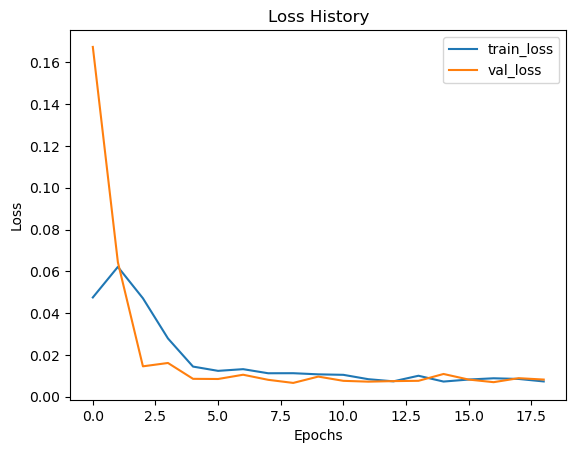

In [42]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Loss History.png")
plt.show()

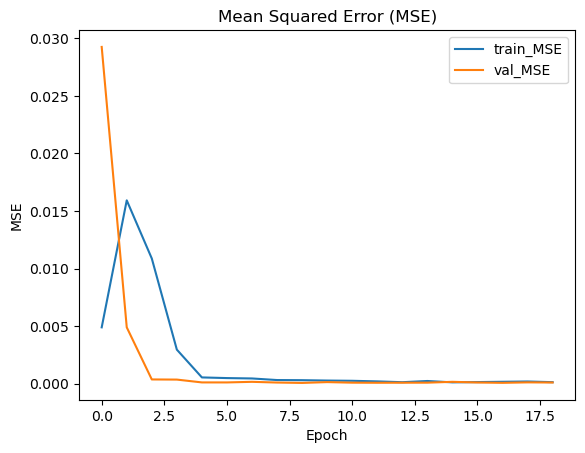

In [43]:
plt.plot(history.history['mean_squared_error'], label='train_MSE')
plt.plot(history.history['val_mean_squared_error'], label='val_MSE')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MSE History.png")
plt.show()

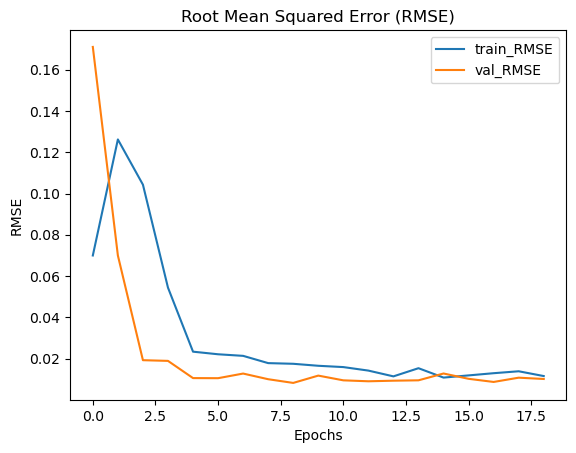

In [44]:
plt.plot(history.history['root_mean_squared_error'], label='train_RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='val_RMSE')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - RMSE History.png")
plt.show()

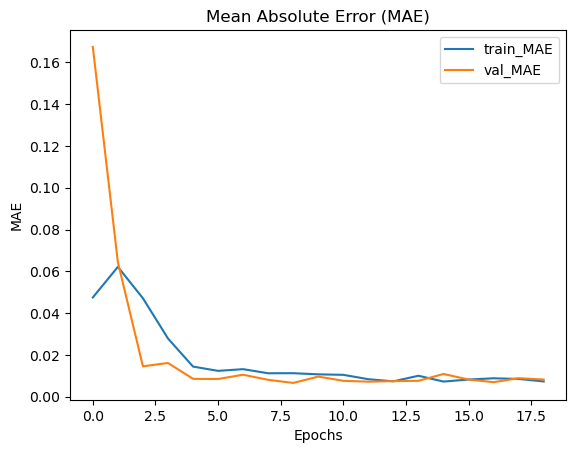

In [45]:
plt.plot(history.history['mean_absolute_error'], label='train_MAE')
plt.plot(history.history['val_mean_absolute_error'], label='val_MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAE History.png")
plt.show()

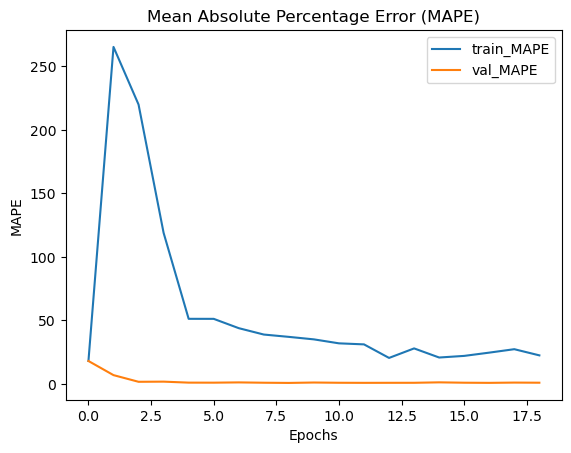

In [46]:
plt.plot(history.history['mean_absolute_percentage_error'], label='train_MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='val_MAPE')
plt.title('Mean Absolute Percentage Error (MAPE)')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAPE History.png")
plt.show()

Fazer uma predição

2025-04-14 20:41:53.640312: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Inputs Shape: (7598, 4, 3)
Labels Shape: (7598, 1, 1)
Prediction Shape: (7598, 1, 10)


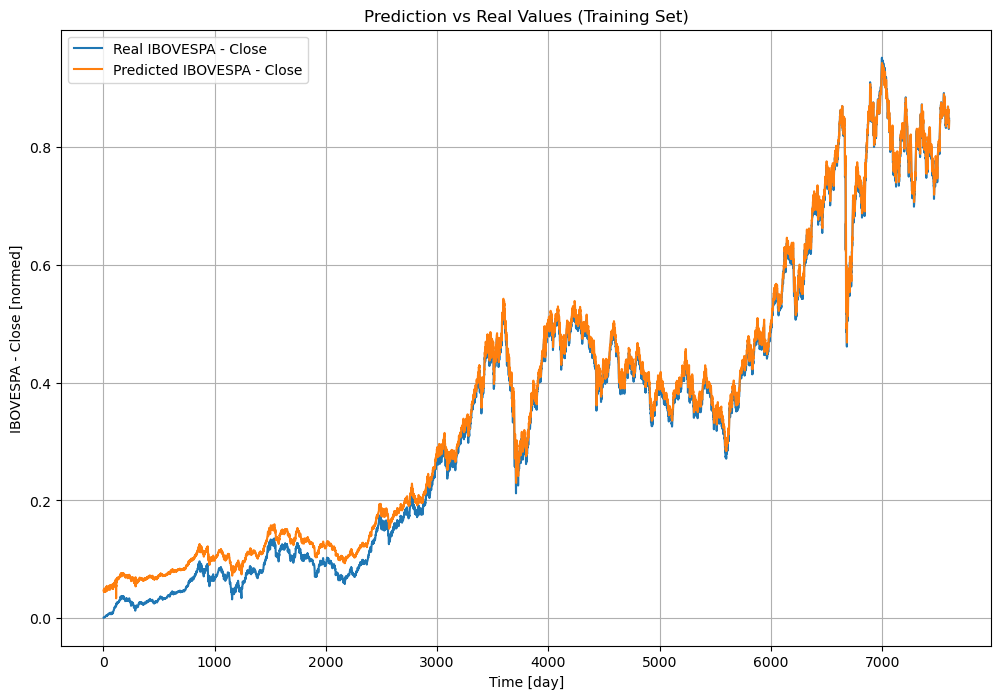

In [47]:
# create inputs and labels
inputs, labels = None, None
for train in iter(multi_window.train):
  if inputs is None:
    inputs = train[0]
    labels = train[1]
  else:
    inputs = np.concatenate((inputs, train[0]), axis=0)
    labels = np.concatenate((labels, train[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)column), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot shifted
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Training Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Training Set).png")
plt.show()

Inputs Shape: (257, 4, 3)
Labels Shape: (257, 1, 1)
Prediction Shape: (257, 1, 10)


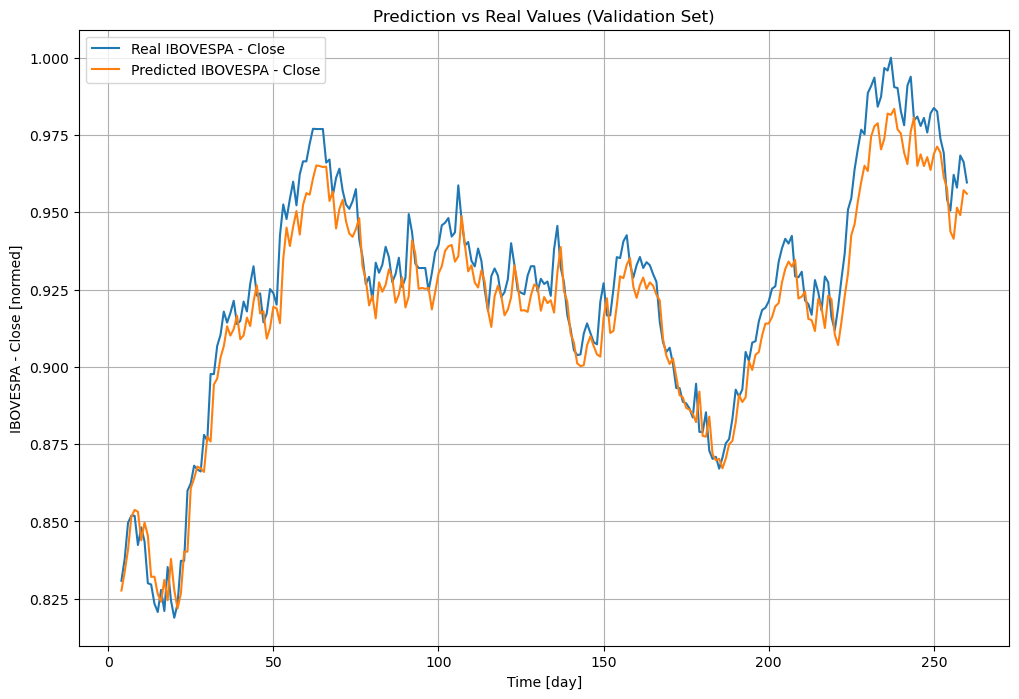

In [48]:
# create inputs and labels
inputs, labels = None, None
for val in iter(multi_window.val):
  if inputs is None:
    inputs = val[0]
    labels = val[1]
  else:
    inputs = np.concatenate((inputs, val[0]), axis=0)
    labels = np.concatenate((labels, val[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# plot the labels and predictions
# for i in range(2):#OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Validation Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Validation Set).png")
plt.show()

Inputs Shape: (125, 4, 3)
Labels Shape: (125, 1, 1)
Prediction Shape: (125, 1, 10)


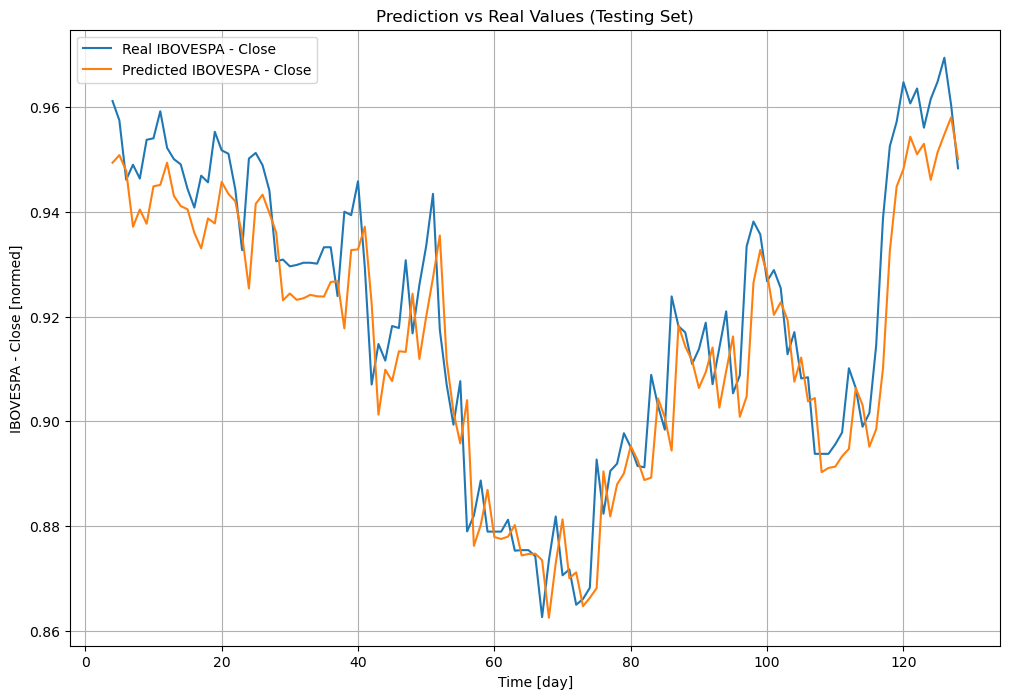

In [49]:
# create inputs and labels
inputs, labels = None, None
for test in iter(multi_window.test):
  if inputs is None:
    inputs = test[0]
    labels = test[1]
  else:
    inputs = np.concatenate((inputs, test[0]), axis=0)
    labels = np.concatenate((labels, test[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Testing Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Testing Set).png")
plt.show()

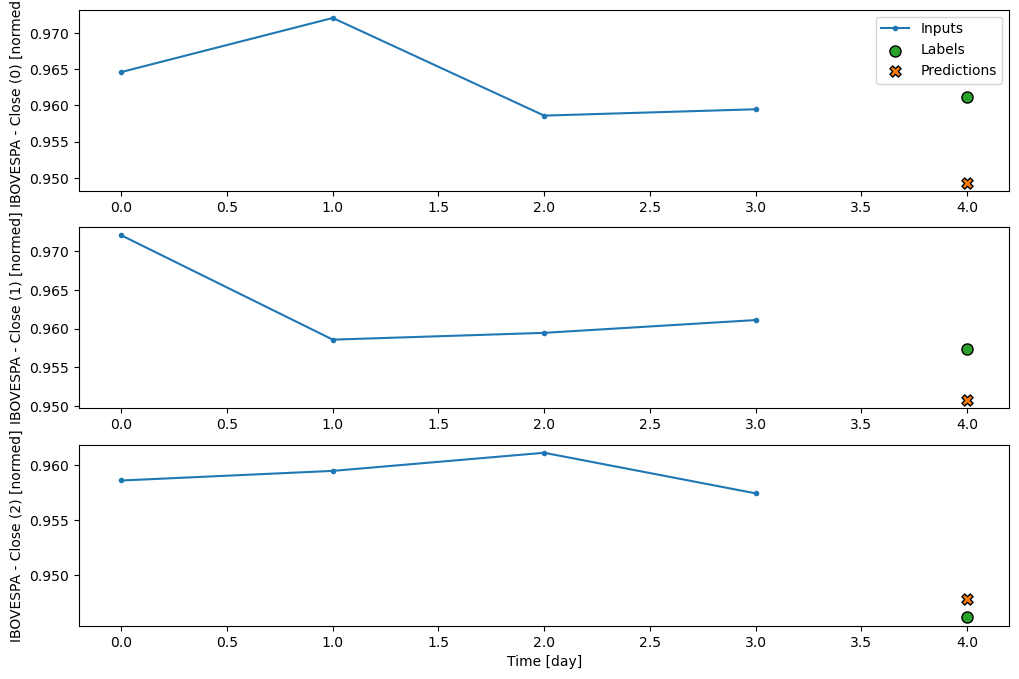

In [50]:
# multi_window.example = next(iter(multi_window.test))
multi_window.plot(model, plot_col=COLUMN_TO_PREDICT)

In [51]:
run_end = time.time()

timeMillisec = (run_end-run_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:0m:53s:406ms


In [52]:
# make a prediction
prediction = model.predict(multi_window.test)
prediction

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step 

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


array([[[0.9493495, 0.9493495, 0.9493495, ..., 0.9493495, 0.9493495,
         0.9493495]],

       [[0.9507896, 0.9507896, 0.9507896, ..., 0.9507896, 0.9507896,
         0.9507896]],

       [[0.9477936, 0.9477936, 0.9477936, ..., 0.9477936, 0.9477936,
         0.9477936]],

       ...,

       [[0.9547571, 0.9547571, 0.9547571, ..., 0.9547571, 0.9547571,
         0.9547571]],

       [[0.9580245, 0.9580245, 0.9580245, ..., 0.9580245, 0.9580245,
         0.9580245]],

       [[0.9500655, 0.9500655, 0.9500655, ..., 0.9500655, 0.9500655,
         0.9500655]]], shape=(125, 1, 10), dtype=float32)

In [53]:
prediction.shape

(125, 1, 10)

Salvar e carregar modelo

In [54]:
# model = ...  # Get model (Sequential, Functional Model, or Model subclass)
# model.save('path/to/location.keras')  # The file needs to end with the .keras extension
# model = keras.models.load_model('path/to/location.keras')